In [408]:
# Modules

import numpy as np
import pandas as pd
import math
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

In [410]:
# Data
train_df=pd.read_csv('electricity_train.csv')
test_df=pd.read_csv('electricity_test.csv')
submission=pd.read_csv('electricity_sample_submission.csv')

In [411]:
# Rename columns
train_df.columns = ['num','datetime','target','temperature','windspeed','humidity','precipitation','insolation','nelec_cool_flag','solar_flag']
test_df.columns = ['num','datetime','temperature','windspeed','humidity','precipitation','insolation','nelec_cool_flag','solar_flag']

In [418]:
# 날짜를 인덱스로
eda_df = train_df.copy()
eda_df.set_index('datetime', inplace = True)

In [419]:
#결측치 보간
test_df = test_df.interpolate(method='values')

In [423]:
#빌딩별 변수 생성
for i in range(1,61):
    globals()['building_' + '{}'.format(i)] = eda_df.loc[eda_df['num'] == i]

### 빌딩1

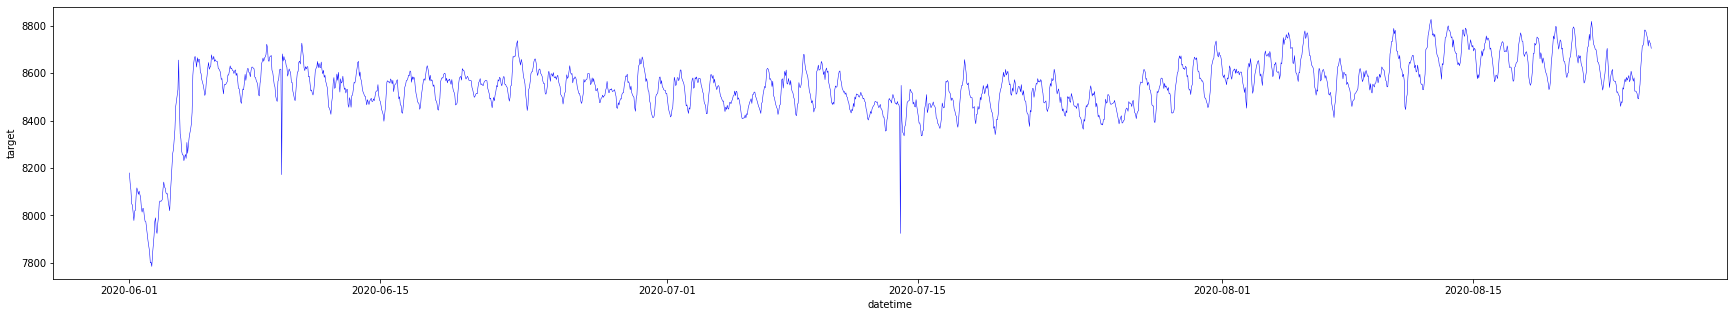

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_1, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
#이상치
building_1.loc['2020-06-09 11:00:00':'2020-06-09 13:00:00']

num    target  temperature  windspeed  humidity  \
datetime                                                               
2020-06-09 11:00:00    1  8616.456         29.5        3.1      40.0   
2020-06-09 12:00:00    1  8171.928         31.1        1.8      40.0   
2020-06-09 13:00:00    1  8681.904         31.9        3.4      38.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-06-09 11:00:00            0.0         1.0              0.0         0.0   
2020-06-09 12:00:00            0.0         1.0              0.0         0.0   
2020-06-09 13:00:00            0.0         1.0              0.0         0.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-06-09 11:00:00    11  ...     204        41616           81   
2020-06-09 12:00:00    12  ...     205        42025           81   
2020-06-09 13:00:00    13  ...     206        42436           81   

                     temperature_f  heatindex  windchillindex   CDH  mean_CDH  \
datetime                                                                        
2020-06-09 11:00:00          56.30  85.702080       29.069301 -33.1  1.308333   
2020-06-09 12:00:00          59.18  82.654423       31.113322 -24.9  1.308333   
2020-06-09 13:00:00          60.62  80.933373       31.738290 -15.5  1.308333   

                     typoon  817  
datetime                          
2020-06-09 11:00:00       0    0  
2020-06-09 12:00:00       0    0  
2020-06-09 13:00:00       0    0  

[3 rows x 30 columns]

In [ ]:
building_1.loc['2020-07-14 00:00:00':'2020-07-14 02:00:00']

num    target  temperature  windspeed  humidity  \
datetime                                                               
2020-07-14 00:00:00    1  8449.272         17.9        3.8      97.0   
2020-07-14 01:00:00    1  7923.744         17.7        3.1      97.0   
2020-07-14 02:00:00    1  8549.064         17.6        3.6      98.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-07-14 00:00:00            5.3         0.0              0.0         0.0   
2020-07-14 01:00:00            5.3         0.0              0.0         0.0   
2020-07-14 02:00:00            3.7         0.0              0.0         0.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-07-14 00:00:00     0  ...    1033      1067089         1936   
2020-07-14 01:00:00     1  ...    1034      1069156         1936   
2020-07-14 02:00:00     2  ...    1035      1071225         1936   

                     temperature_f   heatindex  windchillindex   CDH  \
datetime                                                               
2020-07-14 00:00:00          35.42  127.801943       15.235431 -87.5   
2020-07-14 01:00:00          35.06  129.648496       15.817232 -89.2   
2020-07-14 02:00:00          34.88  129.018723       15.104199 -91.0   

                      mean_CDH  typoon  817  
datetime                                     
2020-07-14 00:00:00 -80.158333       0    0  
2020-07-14 01:00:00 -80.158333       0    0  
2020-07-14 02:00:00 -80.158333       0    0  

[3 rows x 30 columns]

In [ ]:
#이상치 양 옆 평균값으로 바꾸기
building_1.loc['2020-06-09 12:00:00','target'] = (building_1.loc['2020-06-09 11:00:00', 'target'] + building_1.loc['2020-06-09 13:00:00', 'target']) / 2
building_1.loc['2020-07-14 01:00:00','target'] = (building_1.loc['2020-07-14 00:00:00', 'target'] + building_1.loc['2020-07-14 02:00:00', 'target']) / 2

C:\Users\YOGA\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
building_1 = building_1.loc['2020-06-08':]

### 빌딩2

### 빌딩3

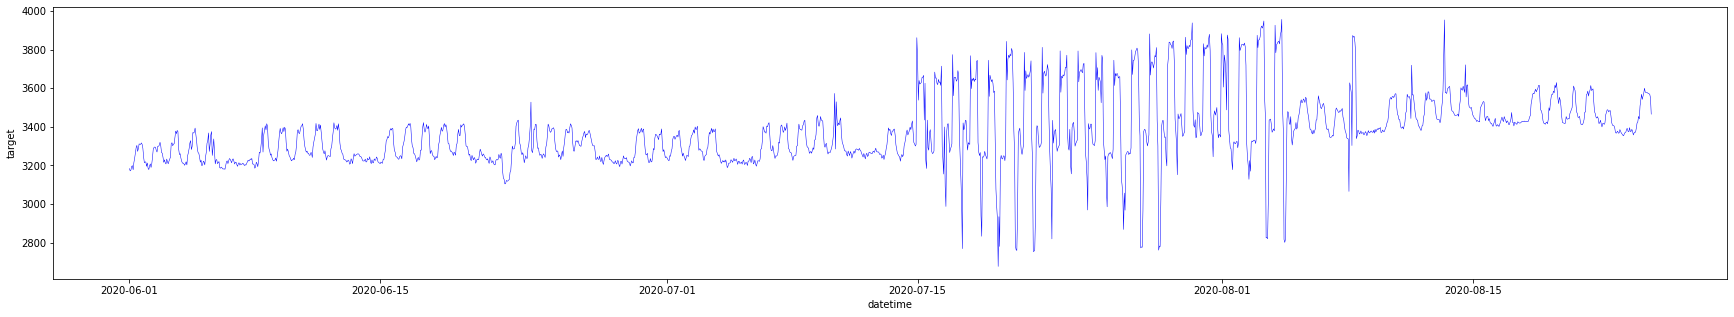

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_3, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

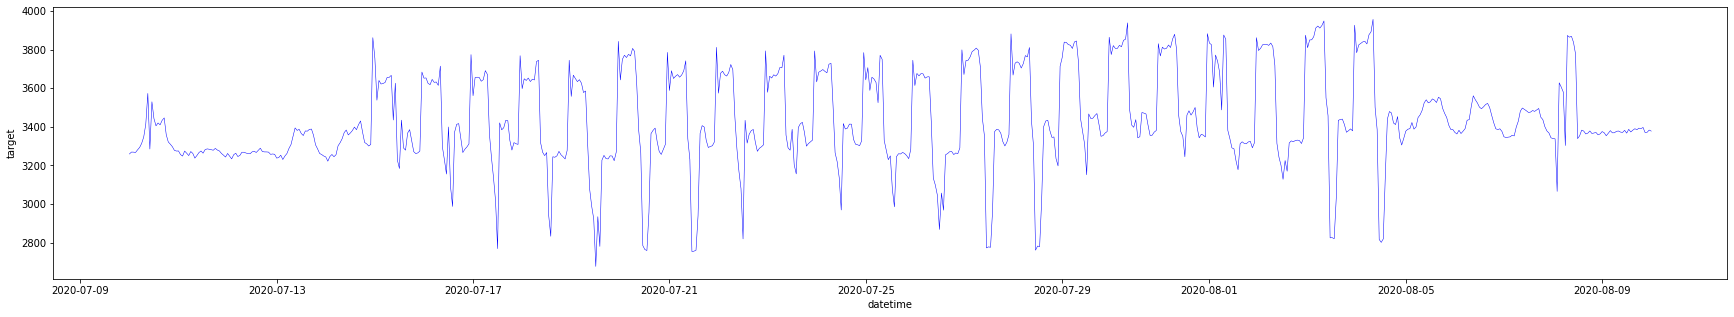

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_3.loc['2020-07-10 00:00:00':'2020-08-10 00:00:00'], x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_3 = pd.concat([building_3.loc[:'2020-07-14 23:00:00'], building_3.loc['2020-08-05 00:00:00':]])

In [ ]:
building_3.sort_values('target').tail(1)

num       target  temperature  windspeed  humidity  \
datetime                                                                  
2020-08-13 10:00:00    3  3954.728571         28.5        2.6      84.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-08-13 10:00:00            0.0         0.1              1.0         1.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-08-13 10:00:00    10  ...    1763      3108169         5476   

                     temperature_f  heatindex  windchillindex  CDH  mean_CDH  \
datetime                                                                       
2020-08-13 10:00:00           54.5  78.120782       28.145161  7.1    23.425   

                     typoon  817  
datetime                          
2020-08-13 10:00:00       0    0  

[1 rows x 30 columns]

### 빌딩4

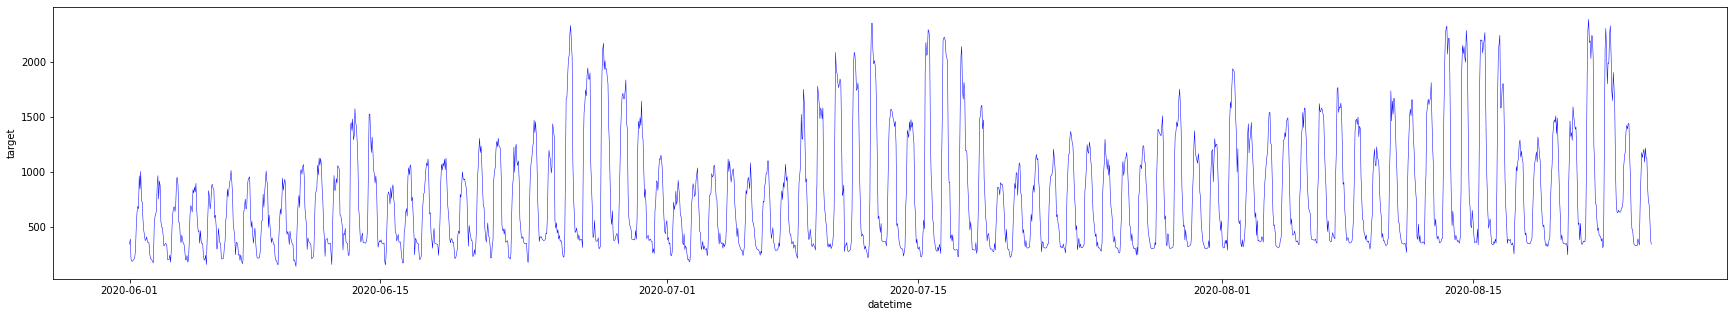

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_4, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
test_df[test_df['num']==4].describe()

num  temperature   windspeed    humidity  precipitation  insolation  \
count  168.0   168.000000  168.000000  168.000000       168.0000  168.000000   
mean     4.0    28.677381    2.401786   70.023810         1.3000    0.203638   
std      0.0     2.542094    1.446920   10.706299         4.4325    0.286263   
min      4.0    24.000000    0.000000   44.000000         0.0000    0.000000   
25%      4.0    26.800000    1.400000   63.583333         0.0000    0.000000   
50%      4.0    28.450000    2.116667   71.000000         0.0000    0.000000   
75%      4.0    30.466667    3.300000   78.000000         0.0000    0.411111   
max      4.0    35.400000    6.500000   90.000000        28.8000    1.000000   

       nelec_cool_flag  solar_flag        hour     weekday  ...   angryindex  \
count            168.0       168.0  168.000000  168.000000  ...   168.000000   
mean               1.0         1.0   11.500000    3.000000  ...  1032.148042   
std                0.0         0.0    6.942881    2.005979  ...    77.738131   
min                1.0         1.0    0.000000    0.000000  ...   775.696000   
25%                1.0         1.0    5.750000    1.000000  ...   993.143000   
50%                1.0         1.0   11.500000    3.000000  ...  1052.403333   
75%                1.0         1.0   17.250000    5.000000  ...  1090.766083   
max                1.0         1.0   23.000000    6.000000  ...  1144.964000   

            hour_1  squared_hour  squared_day  temperature_f   heatindex  \
count   168.000000  1.680000e+02   168.000000     168.000000  168.000000   
mean   2124.500000  4.515852e+06  7925.000000      54.819286   86.546802   
std      48.641546  2.066887e+05   357.081181       4.575768    5.330778   
min    2041.000000  4.165681e+06  7396.000000      46.400000   77.864325   
25%    2082.750000  4.337848e+06  7569.000000      51.440000   83.143655   
50%    2124.500000  4.513500e+06  7921.000000      54.410000   85.181428   
75%    2166.250000  4.692639e+06  8281.000000      58.040000   88.311569   
max    2208.000000  4.875264e+06  8464.000000      66.920000  104.463394   

       windchillindex         CDH    mean_CDH  typoon  
count      168.000000  168.000000  168.000000   168.0  
mean        28.676033   32.355556   32.355556     0.0  
std          2.634349   22.202986   12.889404     0.0  
min         22.943656   -7.800000    3.637500     0.0  
25%         26.987474   19.250000   31.048611     0.0  
50%         28.413815   32.233333   32.286111     0.0  
75%         30.399912   48.525000   42.826389     0.0  
max         35.654574   86.000000   45.406944     0.0  

[8 rows x 28 columns]

In [ ]:
building_4.loc['2020-07-08':'2020-07-18'].describe()

num       target  temperature   windspeed    humidity  precipitation  \
count  264.0   264.000000   264.000000  264.000000  264.000000     264.000000   
mean     4.0   910.200547    22.379167    2.725379   76.393939       0.423106   
std      0.0   648.911995     3.483233    1.230104   14.759032       1.512193   
min      4.0   212.544000    16.900000    0.000000   41.000000       0.000000   
25%      4.0   333.396000    19.400000    1.800000   67.000000       0.000000   
50%      4.0   607.176000    21.500000    2.750000   79.000000       0.000000   
75%      4.0  1480.788000    24.825000    3.600000   89.000000       0.000000   
max      4.0  2351.808000    30.700000    6.600000   96.000000      11.900000   

       insolation  nelec_cool_flag  solar_flag        hour  ...       hour_1  \
count  264.000000            264.0       264.0  264.000000  ...   264.000000   
mean     0.213636              1.0         1.0   11.500000  ...  1020.500000   
std      0.378967              0.0         0.0    6.935334  ...    76.354437   
min      0.000000              1.0         1.0    0.000000  ...   889.000000   
25%      0.000000              1.0         1.0    5.750000  ...   954.750000   
50%      0.000000              1.0         1.0   11.500000  ...  1020.500000   
75%      0.225000              1.0         1.0   17.250000  ...  1086.250000   
max      1.000000              1.0         1.0   23.000000  ...  1152.000000   

       squared_hour  squared_day  temperature_f   heatindex  windchillindex  \
count  2.640000e+02   264.000000     264.000000  264.000000      264.000000   
mean   1.047228e+06  1859.000000      43.482500  113.706634       21.626971   
std    1.559263e+05   272.616055       6.269819   16.031727        4.039980   
min    7.903210e+05  1444.000000      33.620000   84.217107       13.591914   
25%    9.115478e+05  1600.000000      38.120000   99.013297       18.840711   
50%    1.041420e+06  1849.000000      41.900000  117.394657       20.380384   
75%    1.179939e+06  2116.000000      47.885000  125.976631       24.827687   
max    1.327104e+06  2304.000000      58.460000  144.689624       30.908839   

              CDH    mean_CDH  typoon    817  
count  264.000000  264.000000   264.0  264.0  
mean   -42.783712  -42.783712     0.0    0.0  
std     35.429682   29.593175     0.0    0.0  
min    -90.800000  -82.908333     0.0    0.0  
25%    -74.975000  -77.237500     0.0    0.0  
50%    -48.450000  -45.666667     0.0    0.0  
75%    -12.050000  -14.504167     0.0    0.0  
max     31.300000    5.891667     0.0    0.0  

[8 rows x 29 columns]

In [ ]:
building_4.loc['2020-07-18':'2020-07-28'].describe()

num       target  temperature   windspeed    humidity  precipitation  \
count  264.0   264.000000   264.000000  264.000000  264.000000     264.000000   
mean     4.0   670.918000    23.588258    2.296212   82.321970       0.651136   
std      0.0   369.905401     2.996407    1.276396   14.113019       1.610351   
min      4.0   221.616000    16.900000    0.000000   45.000000       0.000000   
25%      4.0   317.304000    21.600000    1.400000   74.000000       0.000000   
50%      4.0   558.792000    22.500000    2.300000   89.000000       0.000000   
75%      4.0   976.104000    25.425000    3.000000   94.000000       0.500000   
max      4.0  1604.880000    31.700000    8.300000   97.000000      15.600000   

       insolation  nelec_cool_flag  solar_flag        hour  ...       hour_1  \
count  264.000000            264.0       264.0  264.000000  ...   264.000000   
mean     0.089394              1.0         1.0   11.500000  ...  1260.500000   
std      0.247499              0.0         0.0    6.935334  ...    76.354437   
min      0.000000              1.0         1.0    0.000000  ...  1129.000000   
25%      0.000000              1.0         1.0    5.750000  ...  1194.750000   
50%      0.000000              1.0         1.0   11.500000  ...  1260.500000   
75%      0.000000              1.0         1.0   17.250000  ...  1326.250000   
max      1.000000              1.0         1.0   23.000000  ...  1392.000000   

       squared_hour  squared_day  temperature_f   heatindex  windchillindex  \
count  2.640000e+02   264.000000     264.000000  264.000000      264.000000   
mean   1.594668e+06  2819.000000      45.658864  101.065808       23.435868   
std    1.925599e+05   335.954641       5.393533   10.354891        3.411050   
min    1.274641e+06  2304.000000      33.620000   82.157706       16.560388   
25%    1.427428e+06  2500.000000      42.080000   95.380949       20.934099   
50%    1.588860e+06  2809.000000      43.700000  100.237808       22.778730   
75%    1.758939e+06  3136.000000      48.965000  105.480151       25.950322   
max    1.937664e+06  3364.000000      60.260000  142.953714       31.597491   

              CDH    mean_CDH  typoon    817  
count  264.000000  264.000000   264.0  264.0  
mean   -28.503788  -28.503788     0.0    0.0  
std     31.239212   26.143499     0.0    0.0  
min    -82.500000  -53.491667     0.0    0.0  
25%    -51.100000  -48.566667     0.0    0.0  
50%    -39.000000  -33.525000     0.0    0.0  
75%    -11.025000  -24.458333     0.0    0.0  
max     47.100000   30.070833     0.0    0.0  

[8 rows x 29 columns]

### 빌딩5

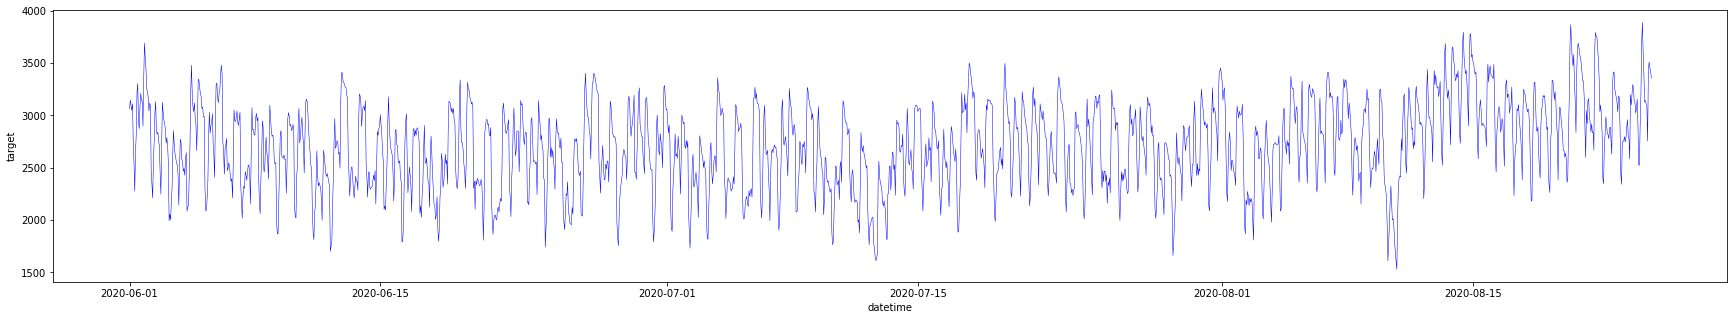

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_5, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
test_df[test_df['num']==5].describe()

num  temperature   windspeed    humidity  precipitation  insolation  \
count  168.0   168.000000  168.000000  168.000000     168.000000  168.000000   
mean     5.0    27.650595    3.142262   81.458333       1.717857    0.210185   
std      0.0     1.979096    1.432692    7.893729       4.033765    0.311430   
min      5.0    24.100000    0.600000   64.000000       0.000000    0.000000   
25%      5.0    26.091667    2.125000   75.250000       0.000000    0.000000   
50%      5.0    27.400000    2.966667   81.000000       0.000000    0.000000   
75%      5.0    28.941667    4.141667   88.000000       1.345833    0.383333   
max      5.0    32.300000    6.800000   96.000000      23.900000    1.000000   

       nelec_cool_flag  solar_flag        hour     weekday  ...   angryindex  \
count            168.0       168.0  168.000000  168.000000  ...   168.000000   
mean               1.0         1.0   11.500000    3.000000  ...  1122.493250   
std                0.0         0.0    6.942881    2.005979  ...   106.019926   
min                1.0         1.0    0.000000    0.000000  ...   780.060000   
25%                1.0         1.0    5.750000    1.000000  ...  1058.594833   
50%                1.0         1.0   11.500000    3.000000  ...  1140.773167   
75%                1.0         1.0   17.250000    5.000000  ...  1199.732000   
max                1.0         1.0   23.000000    6.000000  ...  1385.495000   

            hour_1  squared_hour  squared_day  temperature_f   heatindex  \
count   168.000000  1.680000e+02   168.000000     168.000000  168.000000   
mean   2124.500000  4.515852e+06  7925.000000      52.971071   83.079082   
std      48.641546  2.066887e+05   357.081181       3.562372    5.038087   
min    2041.000000  4.165681e+06  7396.000000      46.580000   75.034255   
25%    2082.750000  4.337848e+06  7569.000000      50.165000   79.697355   
50%    2124.500000  4.513500e+06  7921.000000      52.520000   81.666818   
75%    2166.250000  4.692639e+06  8281.000000      55.295000   85.071853   
max    2208.000000  4.875264e+06  8464.000000      61.340000  103.843740   

       windchillindex         CDH    mean_CDH      typoon  
count      168.000000  168.000000  168.000000  168.000000  
mean        27.124975   19.727976   19.727976    0.285714  
std          2.199221   17.812996   10.110771    0.453104  
min         21.797992   -9.700000    9.181944    0.000000  
25%         25.438601    4.400000    9.955556    0.000000  
50%         27.194917   16.800000   12.994444    0.000000  
75%         28.341442   33.425000   31.338889    1.000000  
max         32.265554   61.000000   34.466667    1.000000  

[8 rows x 28 columns]

### 빌딩6

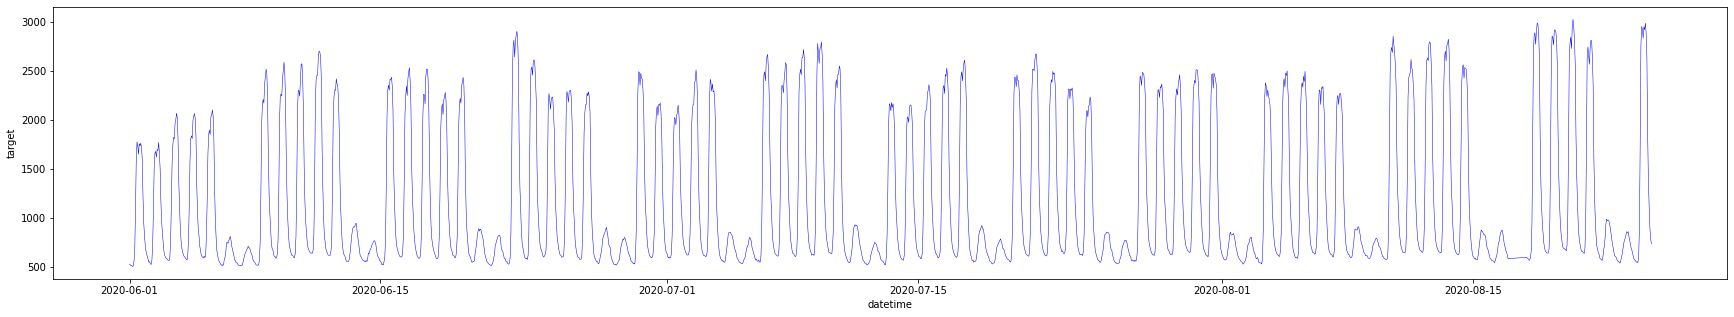

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_6, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩7

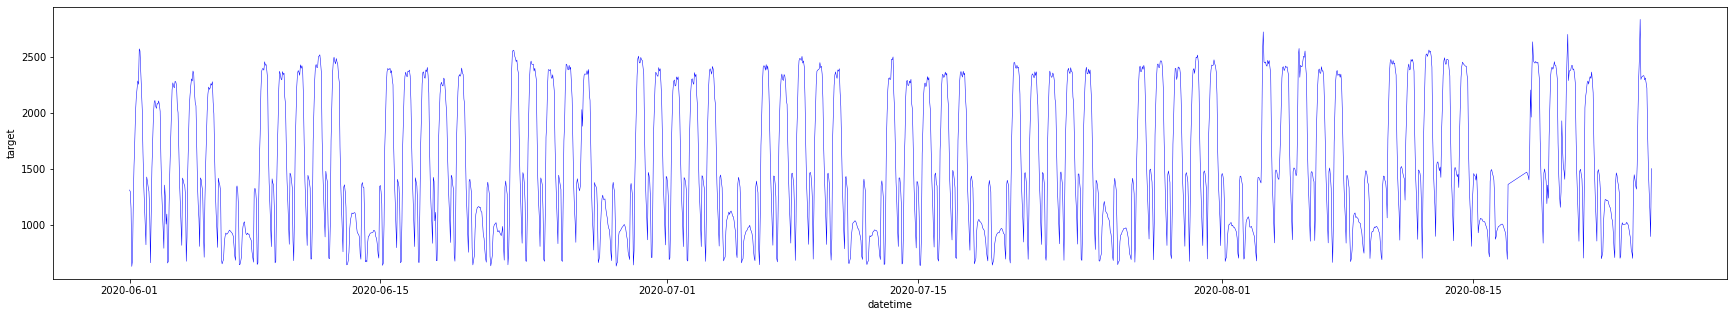

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_7, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩8

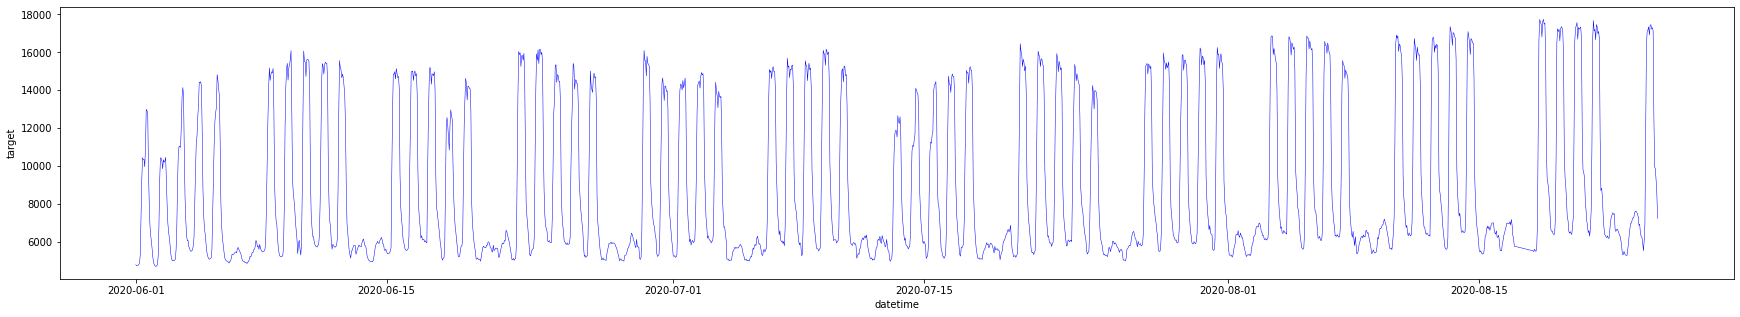

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_8, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩9

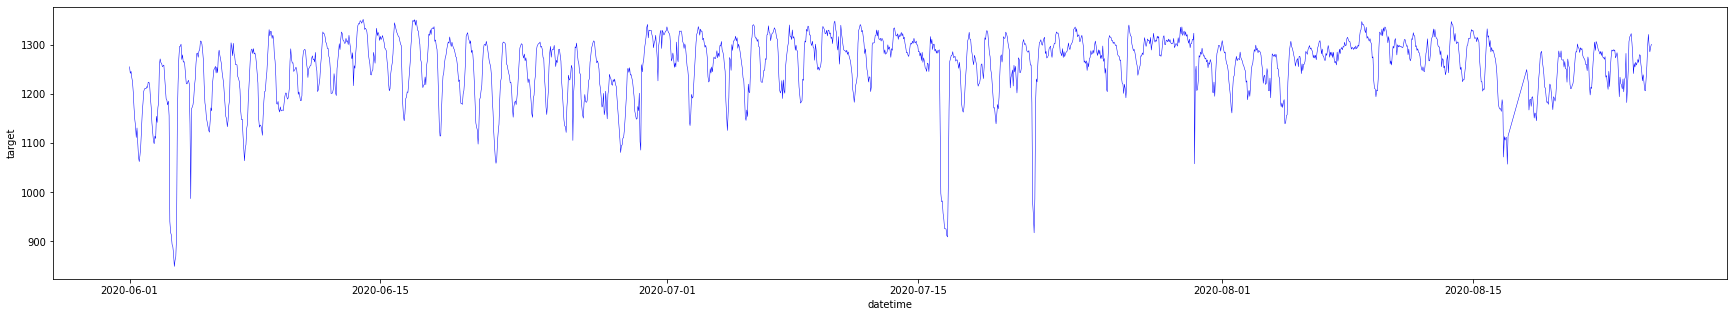

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_9, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_9 = building_9[building_9['target'] > 1050]

### 빌딩10

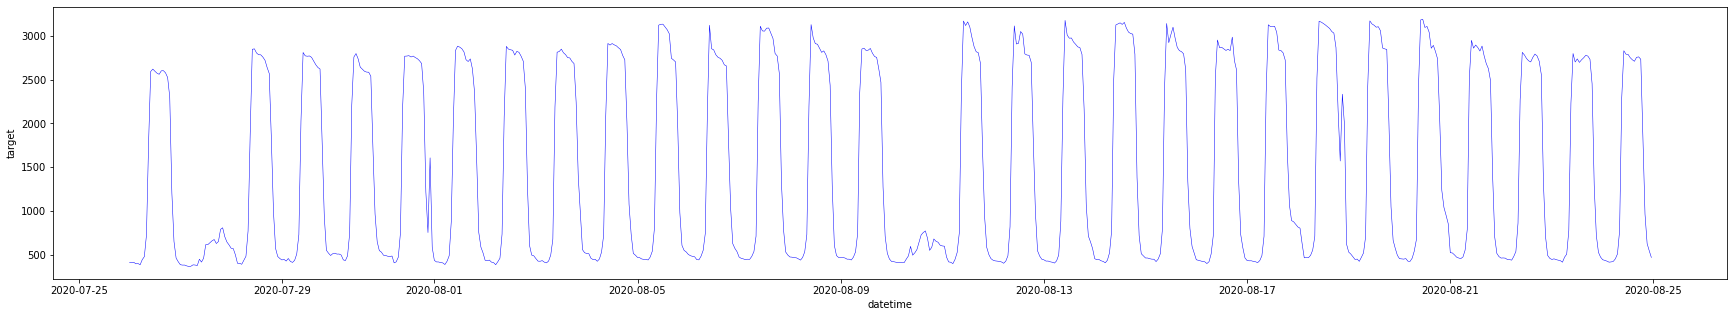

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_10.loc['2020-07-26':], x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_10 = pd.concat([building_10.loc[:'2020-07-26 23:00:00'], building_10.loc['2020-07-28':]])
building_10 = pd.concat([building_10.loc[:'2020-08-09 23:00:00'], building_10.loc['2020-08-11':]])

### 빌딩11

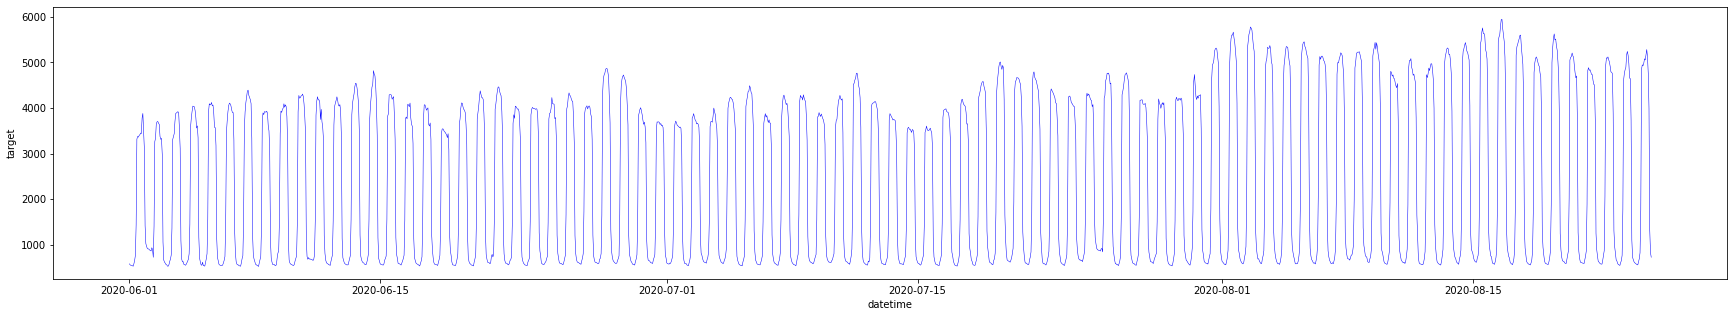

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_11, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩12

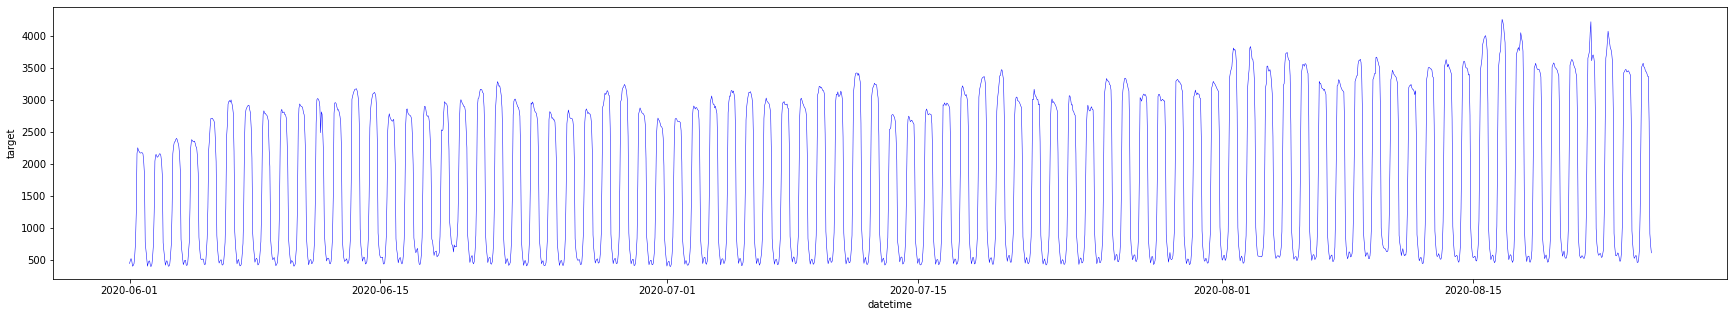

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_12, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩13

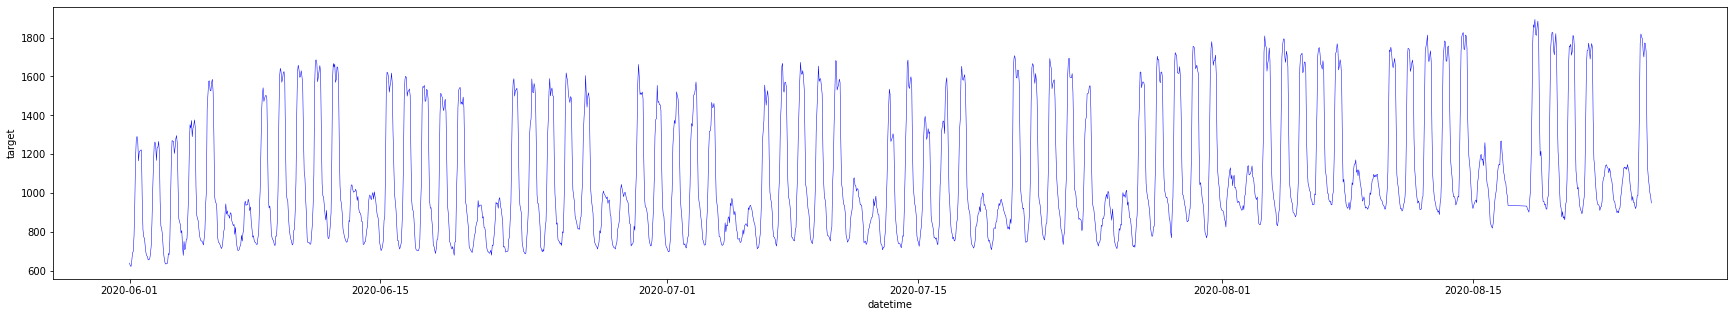

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_13, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩14

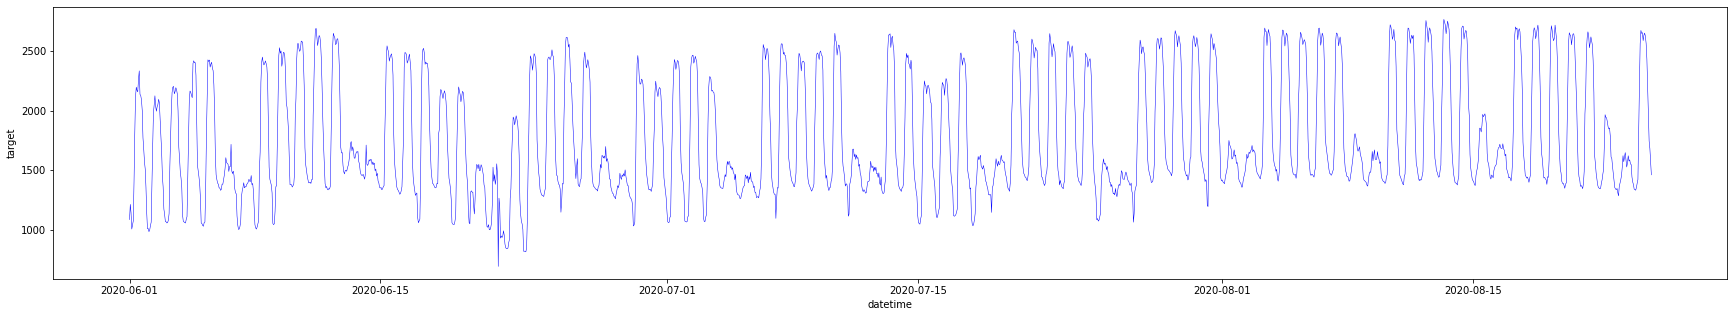

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_14, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩15

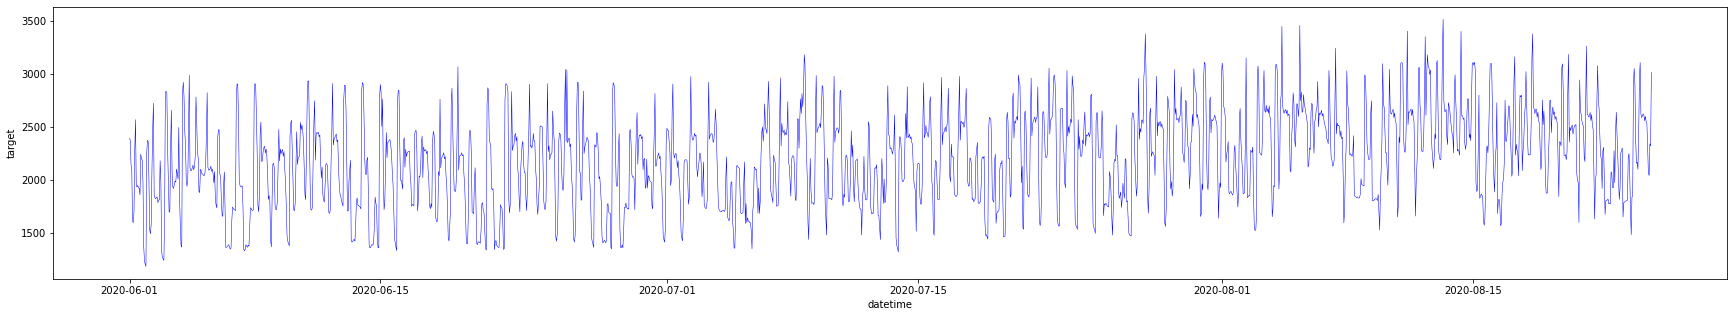

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_15, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩16

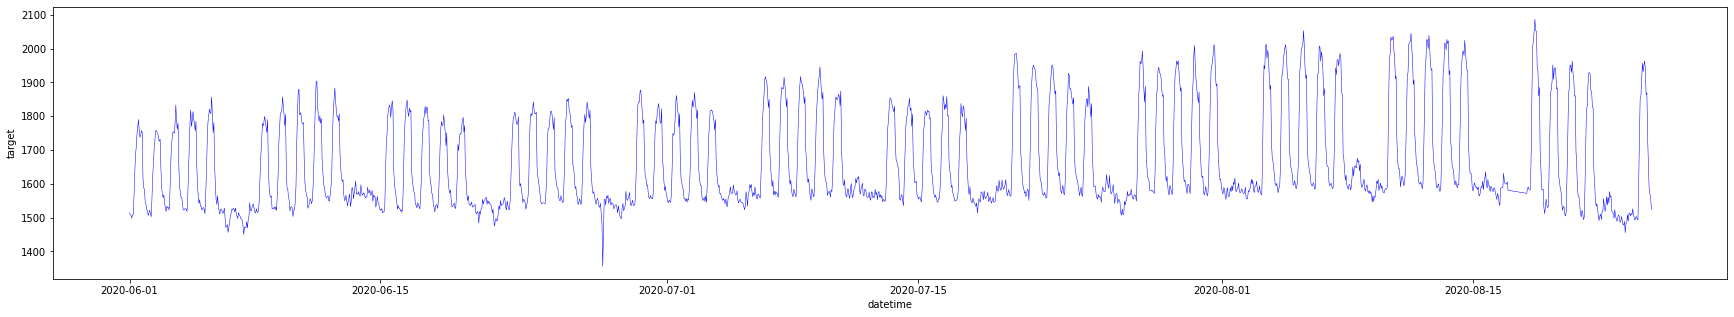

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_16, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_16[building_16['target'] < 1400]

num    target  temperature  windspeed  humidity  \
datetime                                                               
2020-06-27 10:00:00   16  1355.616         26.4        1.2      77.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-06-27 10:00:00            0.0         0.7              1.0         1.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-06-27 10:00:00    10  ...     635       403225          729   

                     temperature_f  heatindex  windchillindex   CDH  \
datetime                                                              
2020-06-27 10:00:00          50.72  91.713656       26.999278 -47.1   

                      mean_CDH  typoon  817  
datetime                                     
2020-06-27 10:00:00 -17.308333       0    0  

[1 rows x 30 columns]

In [ ]:
#이상치 양 옆 평균값으로 바꾸기
building_16.loc['2020-06-27 10:00:00','target'] = (building_16.loc['2020-06-27 09:00:00', 'target'] + building_16.loc['2020-06-27 11:00:00', 'target']) / 2

C:\Users\YOGA\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### 빌딩17

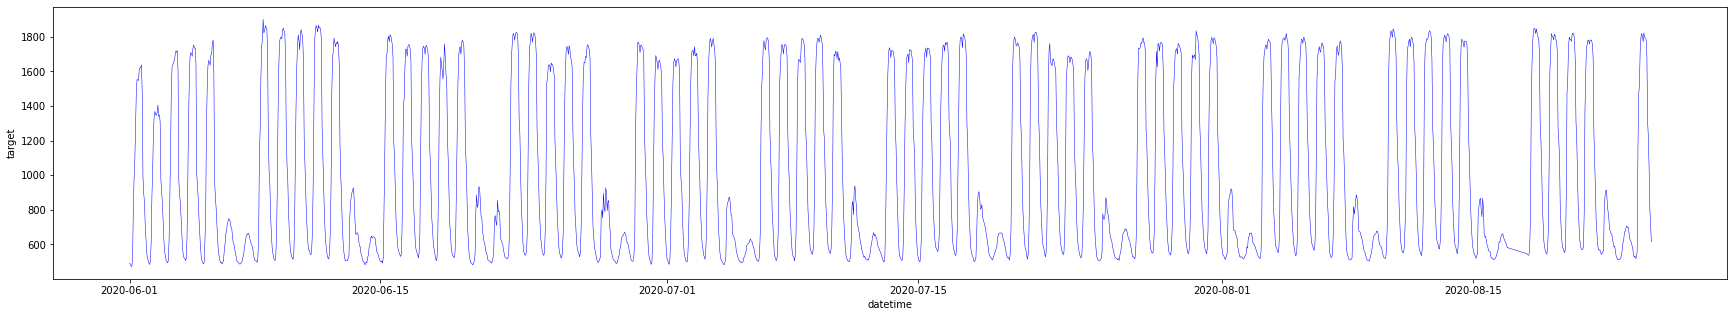

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_17, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩18

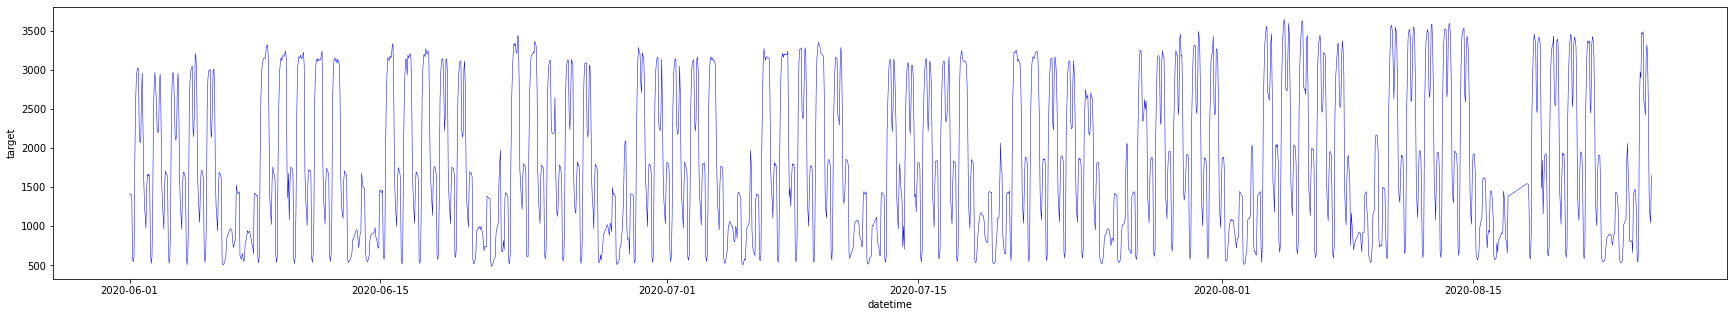

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_18, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩19

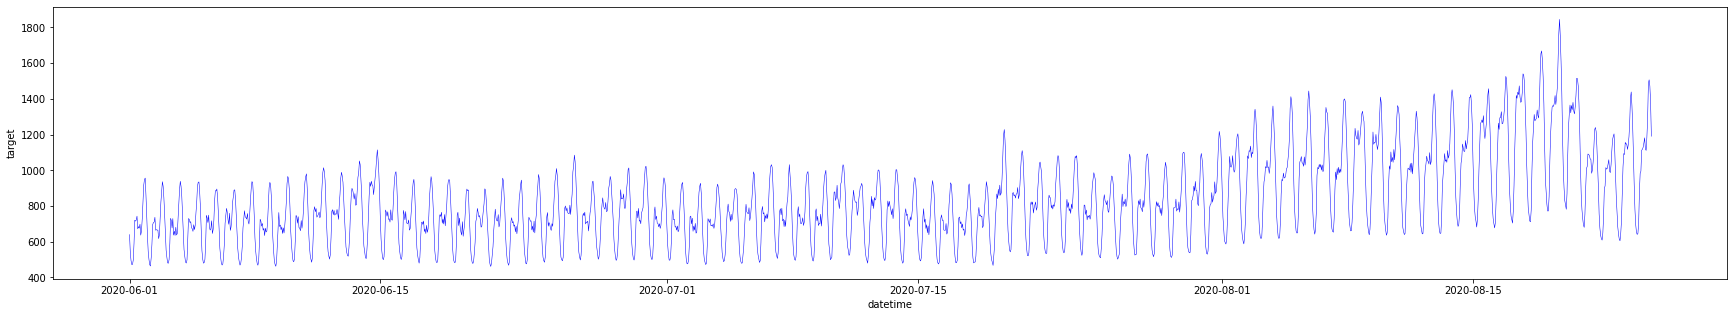

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_19, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩20

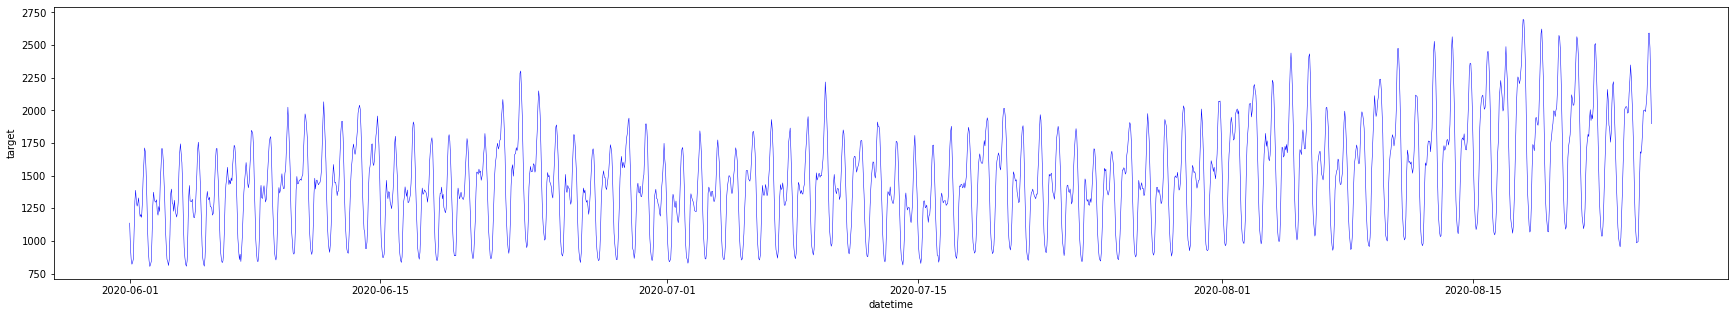

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_20, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩21

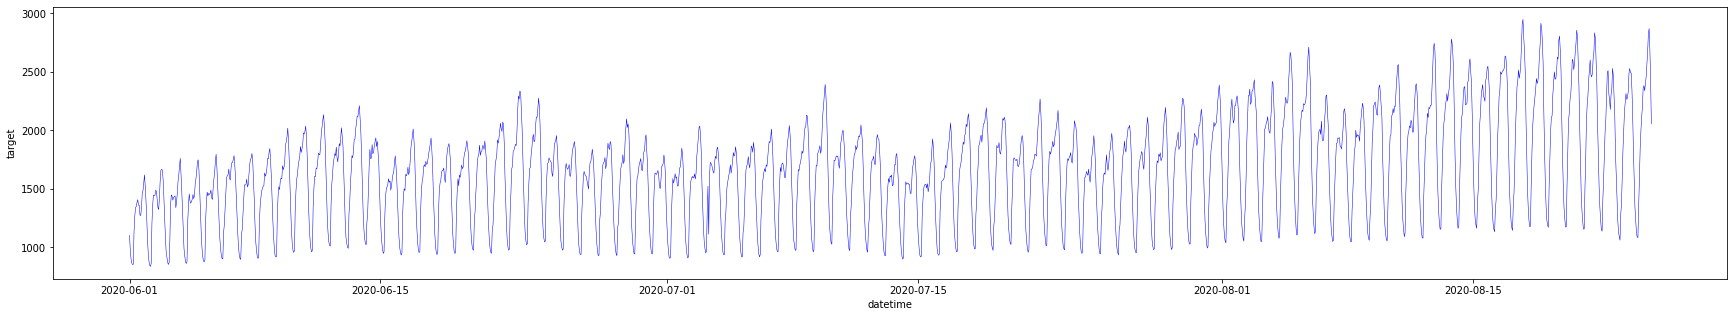

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_21, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩22

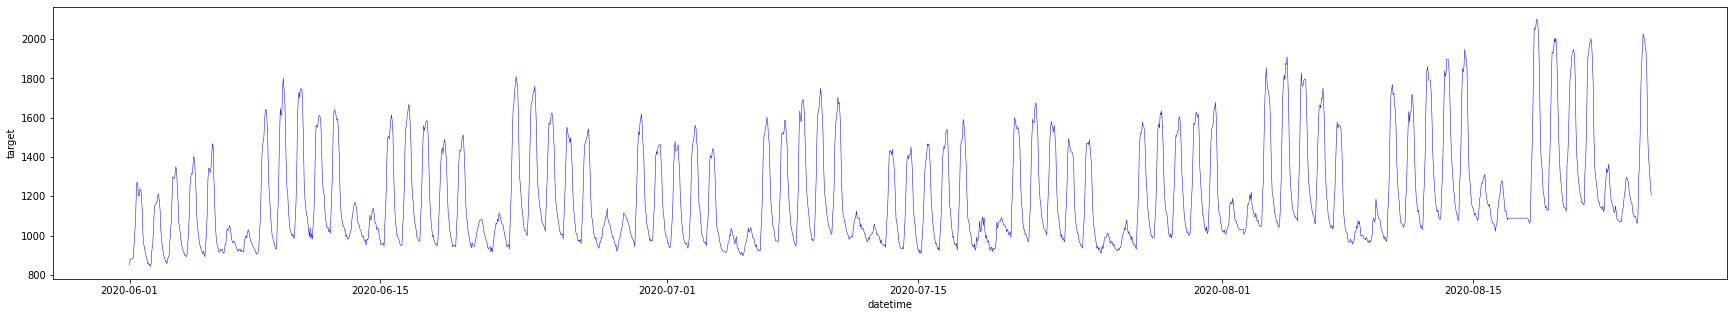

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_22, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩23

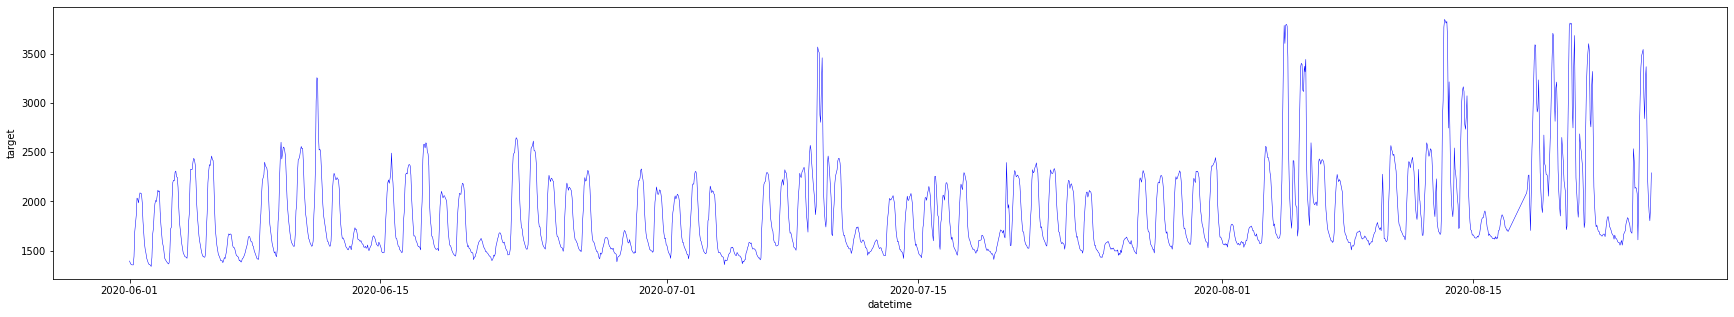

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_23, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
# building_23 = building_23.loc['2020-08-01':]

### 빌딩24

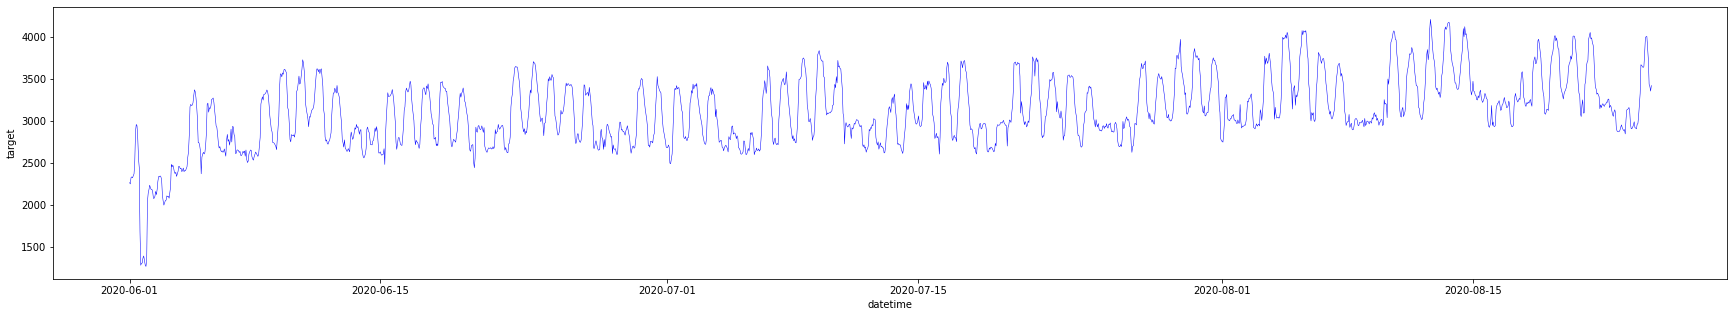

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_24, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_24 = building_24.loc['2020-06-08':]

### 빌딩25

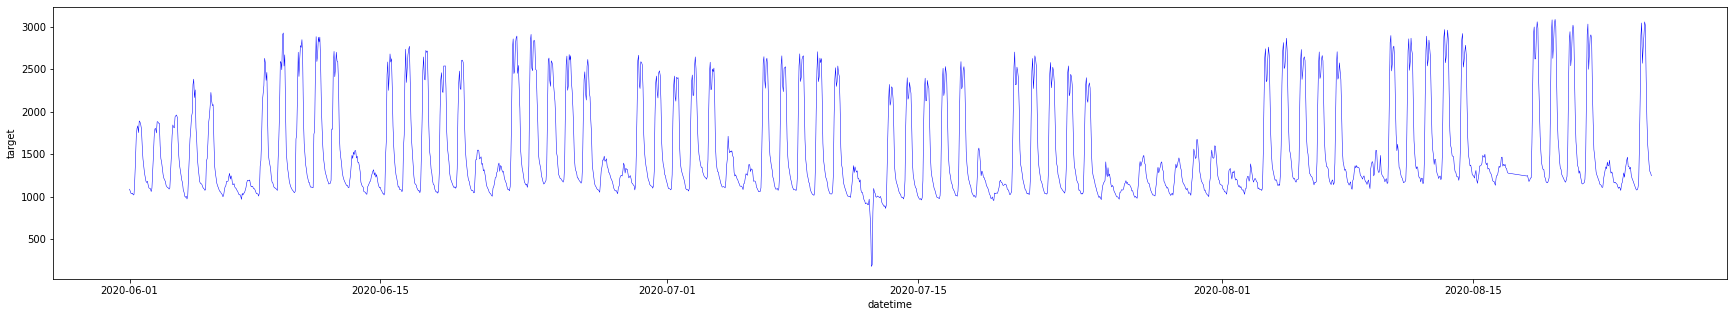

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_25, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_25 = pd.concat([building_25.loc[:'2020-07-23'], building_25.loc['2020-08-03':]])

In [ ]:
building_25[building_25['target'] < 300]

num   target  temperature  windspeed  humidity  \
datetime                                                              
2020-07-12 10:00:00   25  178.524         24.2        3.5      73.0   
2020-07-12 11:00:00   25  198.288         25.0        3.0      71.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-07-12 10:00:00            0.0         0.0              1.0         0.0   
2020-07-12 11:00:00            0.0         0.0              1.0         0.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-07-12 10:00:00    10  ...     995       990025         1764   
2020-07-12 11:00:00    11  ...     996       992016         1764   

                     temperature_f   heatindex  windchillindex   CDH  \
datetime                                                               
2020-07-12 10:00:00          46.76  105.072906       22.839318 -23.1   
2020-07-12 11:00:00          48.20  101.772700       24.082617 -23.5   

                      mean_CDH  typoon  817  
datetime                                     
2020-07-12 10:00:00 -14.954167       0    0  
2020-07-12 11:00:00 -14.954167       0    0  

[2 rows x 30 columns]

In [ ]:
#이상치 양 옆 평균값으로 바꾸기
building_25.loc['2020-07-12 10:00:00','target'] = (building_25.loc['2020-07-12 09:00:00', 'target'] + building_25.loc['2020-07-12 12:00:00', 'target']) / 2
building_25.loc['2020-07-12 11:00:00','target'] = (building_25.loc['2020-07-12 09:00:00', 'target'] + building_25.loc['2020-07-12 12:00:00', 'target']) / 2

### 빌딩26

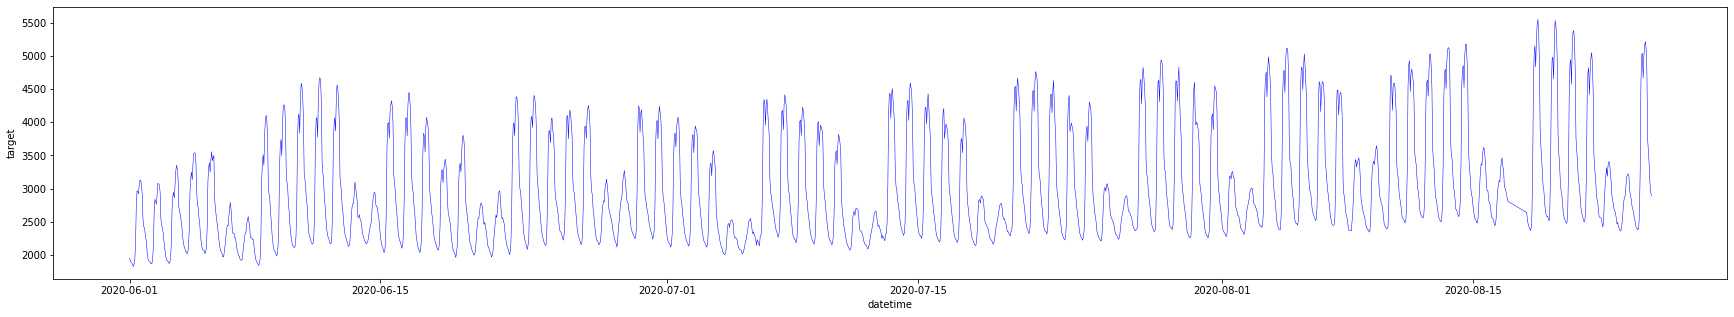

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_26, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩27

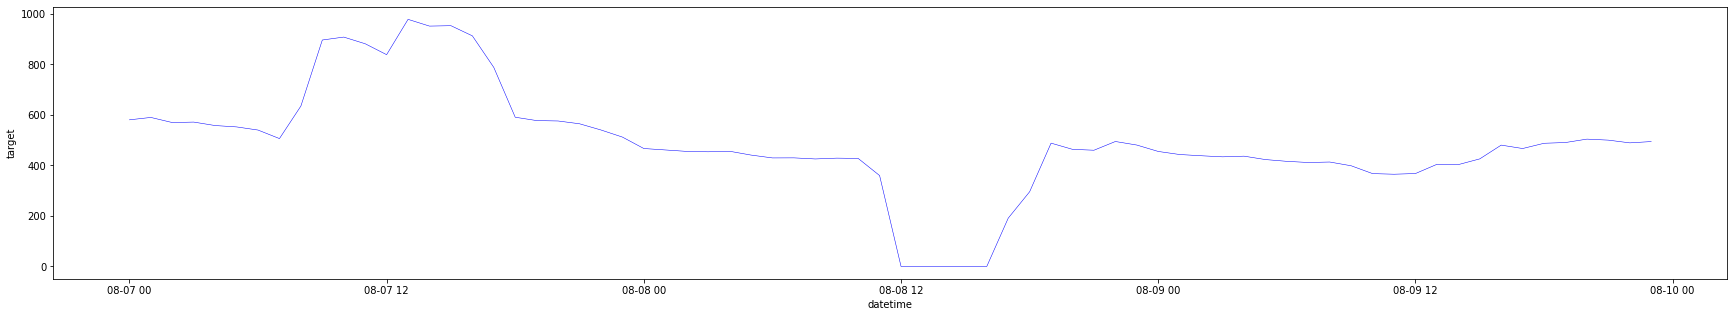

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_27.loc['2020-08-07':'2020-08-09'], x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_27 = building_27[building_27['target'] > 0]

### 빌딩28

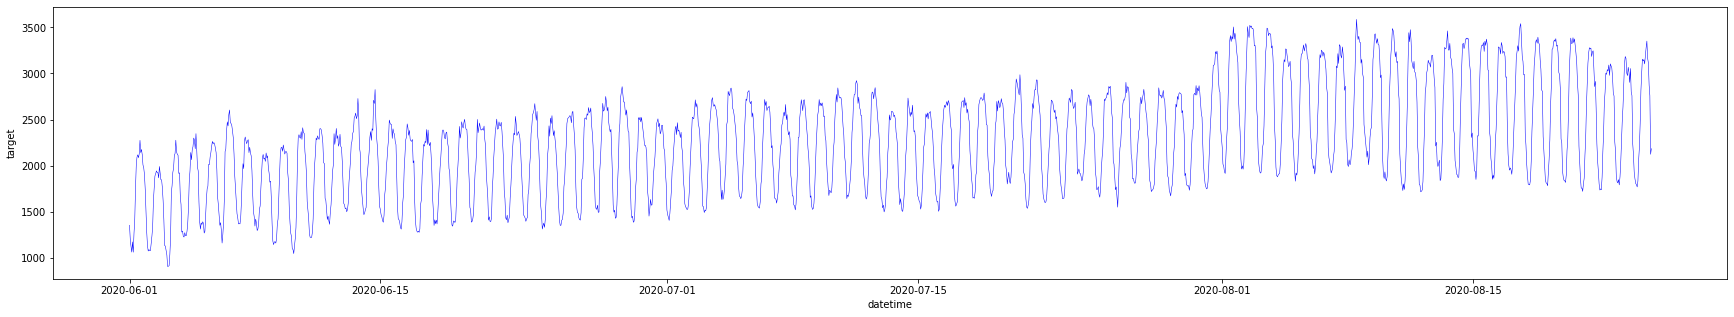

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_28, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩29

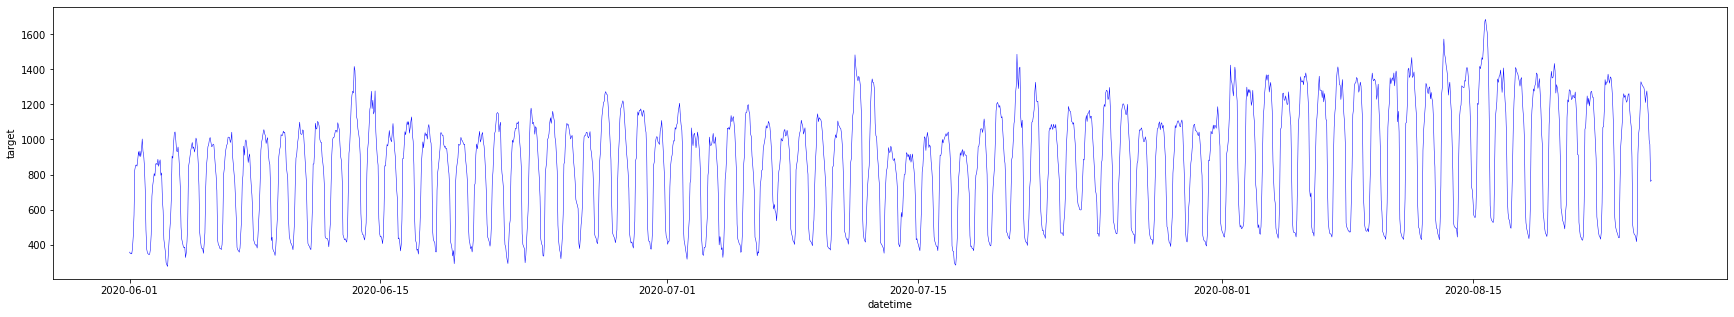

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_29, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩30

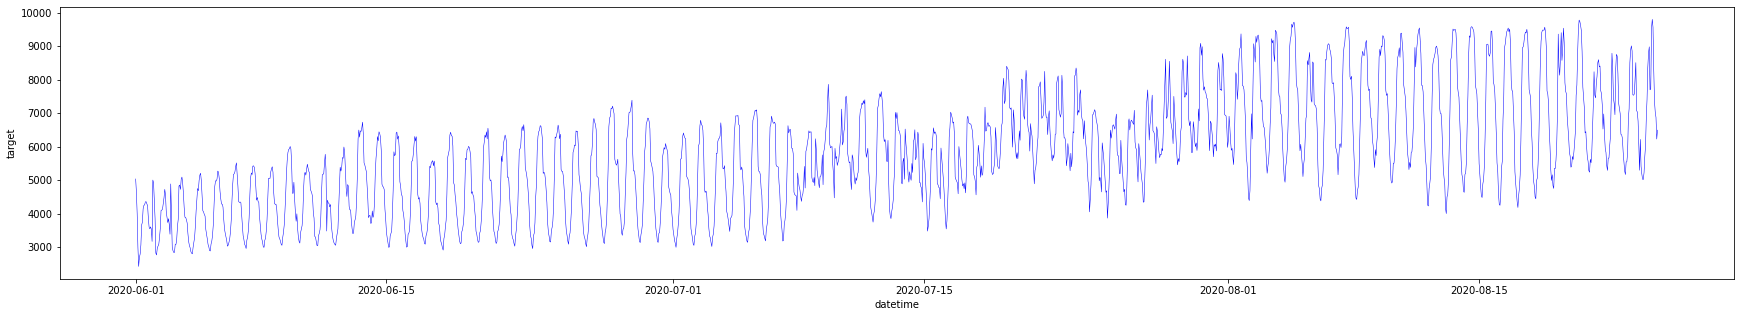

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_30, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩31

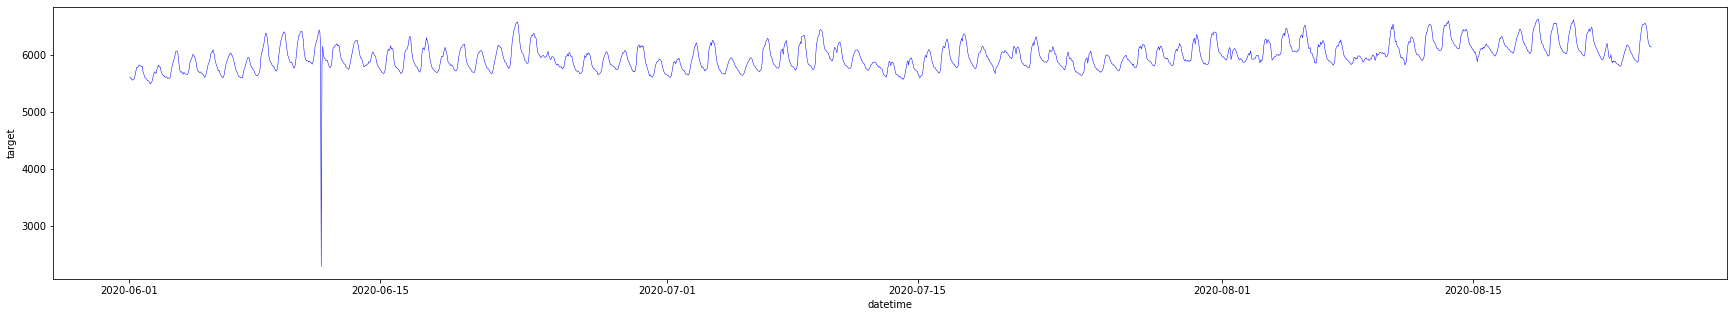

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_31, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_31[building_31['target'] < 5000]

num   target  temperature  windspeed  humidity  \
datetime                                                              
2020-06-11 17:00:00   31  2285.28         31.4        3.2      44.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-06-11 17:00:00            0.0         1.0              1.0         0.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-06-11 17:00:00    17  ...     258        66564          121   

                     temperature_f  heatindex  windchillindex   CDH  mean_CDH  \
datetime                                                                        
2020-06-11 17:00:00          59.72  82.877458       31.190025  14.3 -8.341667   

                     typoon  817  
datetime                          
2020-06-11 17:00:00       0    0  

[1 rows x 30 columns]

In [ ]:
#이상치 양 옆 평균값으로 바꾸기
building_31.loc['2020-06-11 17:00:00','target'] = (building_31.loc['2020-06-11 16:00:00', 'target'] + building_31.loc['2020-06-11 18:00:00', 'target']) / 2

C:\Users\YOGA\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### 빌딩32

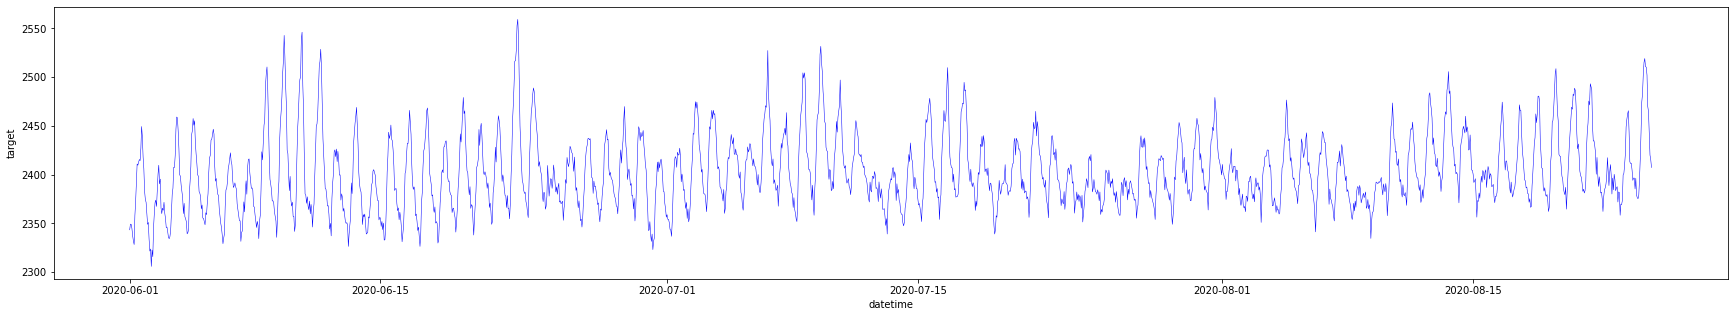

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_32, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_32.sort_values('target').tail(1)

num    target  temperature  windspeed  humidity  \
datetime                                                               
2020-06-22 16:00:00   32  2559.384         33.1        2.4      45.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-06-22 16:00:00            0.0         1.0              0.0         0.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-06-22 16:00:00    16  ...     521       271441          484   

                     temperature_f  heatindex  windchillindex   CDH  mean_CDH  \
datetime                                                                        
2020-06-22 16:00:00          62.78  80.261737       33.105939  23.8   -4.1125   

                     typoon  817  
datetime                          
2020-06-22 16:00:00       0    0  

[1 rows x 30 columns]

In [ ]:
building_32.loc['2020-06-22']

num    target  temperature  windspeed  humidity  \
datetime                                                               
2020-06-22 00:00:00   32  2377.944         21.0        0.6      86.0   
2020-06-22 01:00:00   32  2366.280         21.0        1.1      88.0   
2020-06-22 02:00:00   32  2378.592         20.1        0.7      90.0   
2020-06-22 03:00:00   32  2365.416         19.7        0.8      92.0   
2020-06-22 04:00:00   32  2365.632         19.4        0.6      95.0   
2020-06-22 05:00:00   32  2354.616         19.9        1.1      94.0   
2020-06-22 06:00:00   32  2369.952         20.0        0.1      93.0   
2020-06-22 07:00:00   32  2398.248         22.0        1.0      85.0   
2020-06-22 08:00:00   32  2420.280         25.2        0.6      73.0   
2020-06-22 09:00:00   32  2455.272         27.1        1.0      66.0   
2020-06-22 10:00:00   32  2471.688         28.6        1.6      57.0   
2020-06-22 11:00:00   32  2491.776         29.8        2.1      55.0   
2020-06-22 12:00:00   32  2516.400         31.7        1.5      50.0   
2020-06-22 13:00:00   32  2517.048         32.1        2.7      44.0   
2020-06-22 14:00:00   32  2527.632         32.7        3.2      49.0   
2020-06-22 15:00:00   32  2552.904         33.6        2.5      47.0   
2020-06-22 16:00:00   32  2559.384         33.1        2.4      45.0   
2020-06-22 17:00:00   32  2540.376         32.8        3.3      47.0   
2020-06-22 18:00:00   32  2494.368         31.2        2.7      45.0   
2020-06-22 19:00:00   32  2449.872         29.6        2.2      48.0   
2020-06-22 20:00:00   32  2430.216         26.9        1.6      59.0   
2020-06-22 21:00:00   32  2409.480         24.7        2.1      67.0   
2020-06-22 22:00:00   32  2394.144         24.5        0.8      68.0   
2020-06-22 23:00:00   32  2391.120         24.0        1.1      68.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-06-22 00:00:00            0.0         0.0              0.0         0.0   
2020-06-22 01:00:00            0.0         0.0              0.0         0.0   
2020-06-22 02:00:00            0.0         0.0              0.0         0.0   
2020-06-22 03:00:00            0.0         0.0              0.0         0.0   
2020-06-22 04:00:00            0.0         0.0              0.0         0.0   
2020-06-22 05:00:00            0.0         0.0              0.0         0.0   
2020-06-22 06:00:00            0.0         0.1              0.0         0.0   
2020-06-22 07:00:00            0.0         1.0              0.0         0.0   
2020-06-22 08:00:00            0.0         1.0              0.0         0.0   
2020-06-22 09:00:00            0.0         1.0              0.0         0.0   
2020-06-22 10:00:00            0.0         1.0              0.0         0.0   
2020-06-22 11:00:00            0.0         1.0              0.0         0.0   
2020-06-22 12:00:00            0.0         1.0              0.0         0.0   
2020-06-22 13:00:00            0.0         1.0              0.0         0.0   
2020-06-22 14:00:00            0.0         1.0              0.0         0.0   
2020-06-22 15:00:00            0.0         1.0              0.0         0.0   
2020-06-22 16:00:00            0.0         1.0              0.0         0.0   
2020-06-22 17:00:00            0.0         1.0              0.0         0.0   
2020-06-22 18:00:00            0.0         1.0              0.0         0.0   
2020-06-22 19:00:00            0.0         0.5              0.0         0.0   
2020-06-22 20:00:00            0.0         0.0              0.0         0.0   
2020-06-22 21:00:00            0.0         0.0              0.0         0.0   
2020-06-22 22:00:00            0.0         0.0              0.0         0.0   
2020-06-22 23:00:00            0.0         0.0              0.0         0.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                 

### 빌딩33

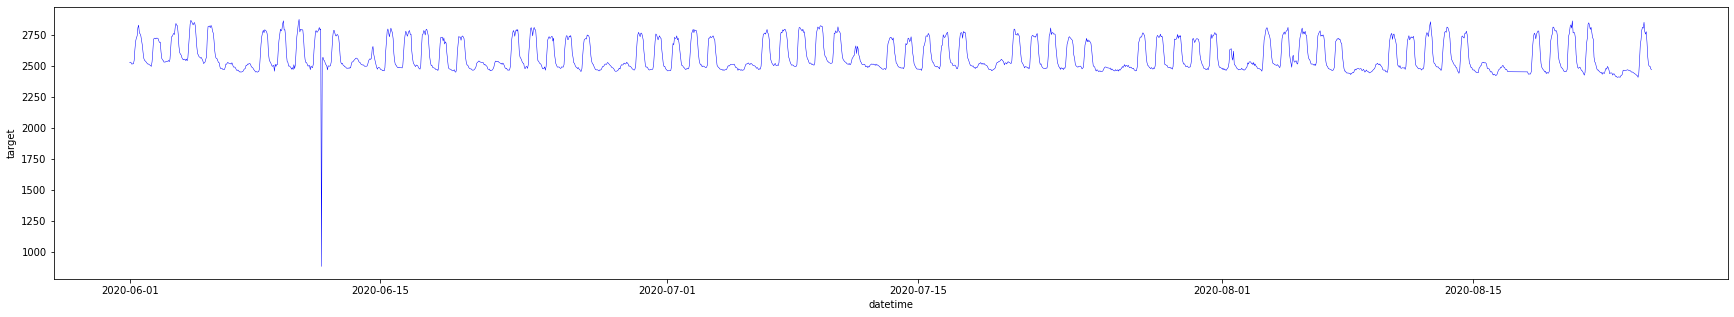

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_33, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_33[building_33['target'] < 2250]

num   target  temperature  windspeed  humidity  \
datetime                                                              
2020-06-11 17:00:00   33  884.304         30.6        1.3      59.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-06-11 17:00:00            0.0         0.8              1.0         0.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-06-11 17:00:00    17  ...     258        66564          121   

                     temperature_f  heatindex  windchillindex  CDH   mean_CDH  \
datetime                                                                        
2020-06-11 17:00:00          58.28  84.345539       30.780411 -1.8 -15.804167   

                     typoon  817  
datetime                          
2020-06-11 17:00:00       0    0  

[1 rows x 30 columns]

In [ ]:
#이상치 양 옆 평균값으로 바꾸기
building_33.loc['2020-06-11 17:00:00','target'] = (building_33.loc['2020-06-11 16:00:00', 'target'] + building_33.loc['2020-06-11 18:00:00', 'target']) / 2

C:\Users\YOGA\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### 빌딩34

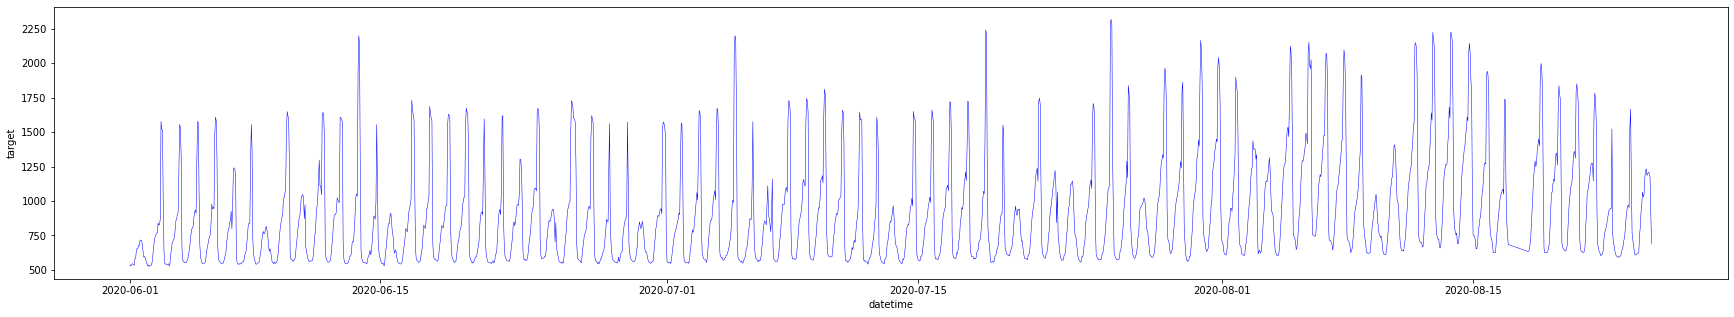

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_34, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩35

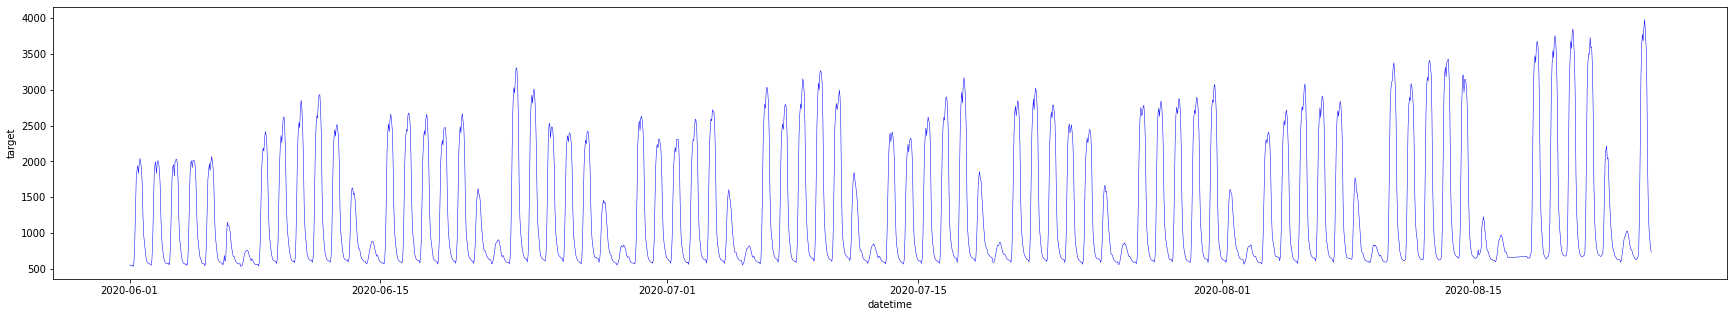

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_35, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩36

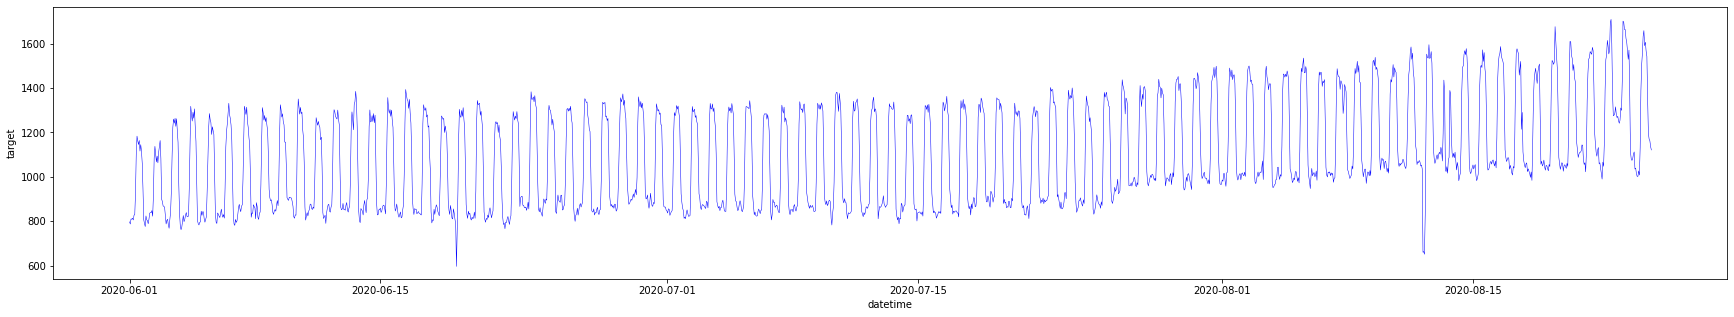

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_36, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_36[building_36['target'] < 700]

num   target  temperature  windspeed  humidity  \
datetime                                                              
2020-06-19 06:00:00   36  596.808         18.7        3.1      94.0   
2020-08-12 05:00:00   36  660.960         26.4        2.9      94.0   
2020-08-12 06:00:00   36  663.768         26.5        3.2      94.0   
2020-08-12 07:00:00   36  651.672         27.0        2.0      94.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-06-19 06:00:00            1.7         0.0              0.0         1.0   
2020-08-12 05:00:00            0.0         0.0              0.0         1.0   
2020-08-12 06:00:00            0.2         0.0              0.0         1.0   
2020-08-12 07:00:00            0.0         0.2              0.0         1.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-06-19 06:00:00     6  ...     439       192721          361   
2020-08-12 05:00:00     5  ...    1734      3006756         5329   
2020-08-12 06:00:00     6  ...    1735      3010225         5329   
2020-08-12 07:00:00     7  ...    1736      3013696         5329   

                     temperature_f   heatindex  windchillindex   CDH  \
datetime                                                               
2020-06-19 06:00:00          36.86  125.020806       16.940288 -78.7   
2020-08-12 05:00:00          50.72   75.600461       25.699922  14.9   
2020-08-12 06:00:00          50.90   75.188816       25.646976  13.5   
2020-08-12 07:00:00          51.80   73.219120       26.900123  12.6   

                      mean_CDH  typoon  817  
datetime                                     
2020-06-19 06:00:00 -71.483333       0    0  
2020-08-12 05:00:00  23.454167       0    0  
2020-08-12 06:00:00  23.454167       0    0  
2020-08-12 07:00:00  23.454167       0    0  

[4 rows x 30 columns]

In [ ]:
building_36.loc['2020-06-19 06:00:00', 'target'] = building_36.loc['2020-06-19 05:00:00', 'target'] + building_36.loc['2020-06-19 07:00:00', 'target'] 
building_36.loc['2020-08-12 05:00:00', 'target'] = building_36.loc['2020-08-12 04:00:00', 'target'] + building_36.loc['2020-08-12 08:00:00', 'target'] 
building_36.loc['2020-08-12 06:00:00', 'target'] = building_36.loc['2020-08-12 04:00:00', 'target'] + building_36.loc['2020-08-12 08:00:00', 'target'] 
building_36.loc['2020-08-12 07:00:00', 'target'] = building_36.loc['2020-08-12 04:00:00', 'target'] + building_36.loc['2020-08-12 08:00:00', 'target'] 

C:\Users\YOGA\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### 빌딩37

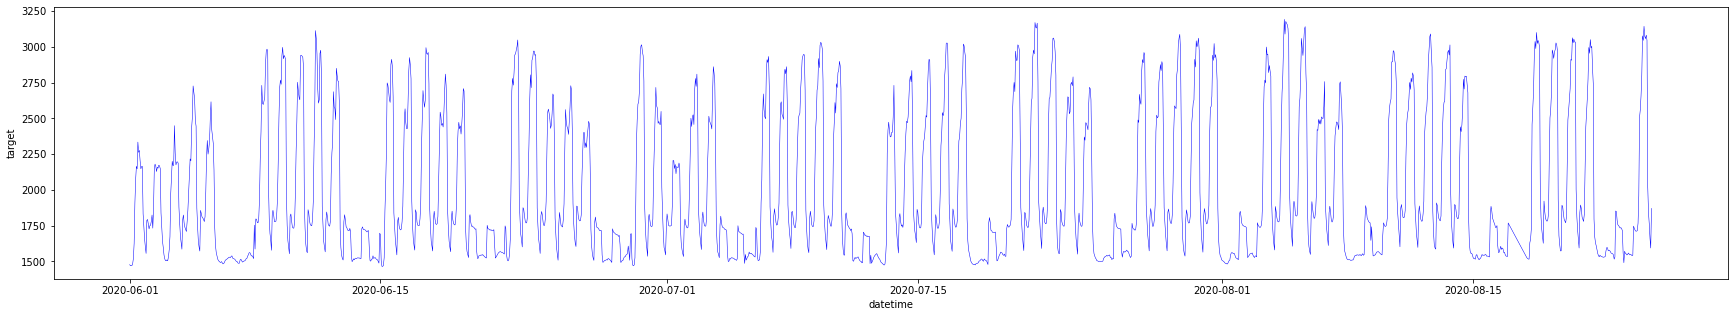

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_37, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩38

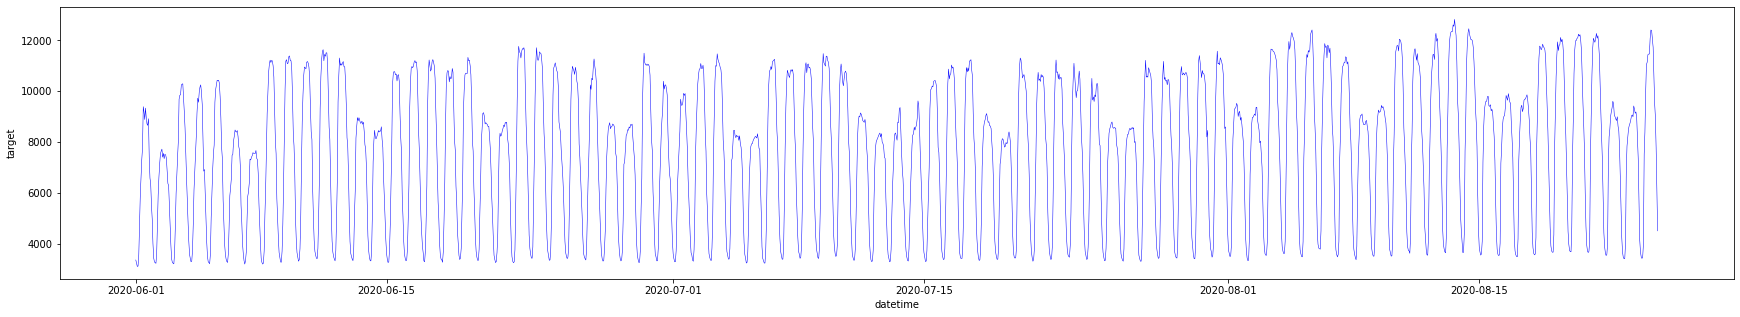

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_38, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩39

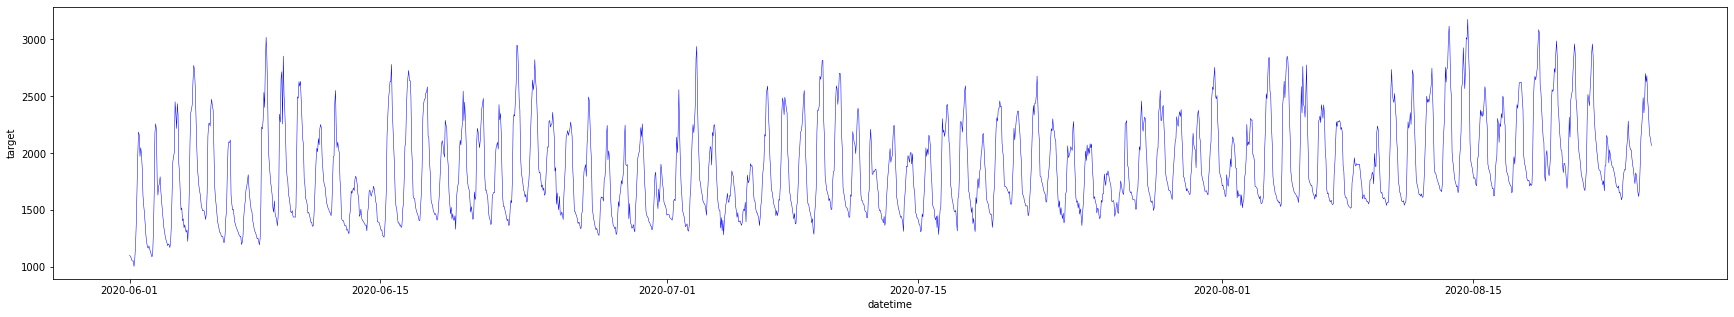

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_39, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩40

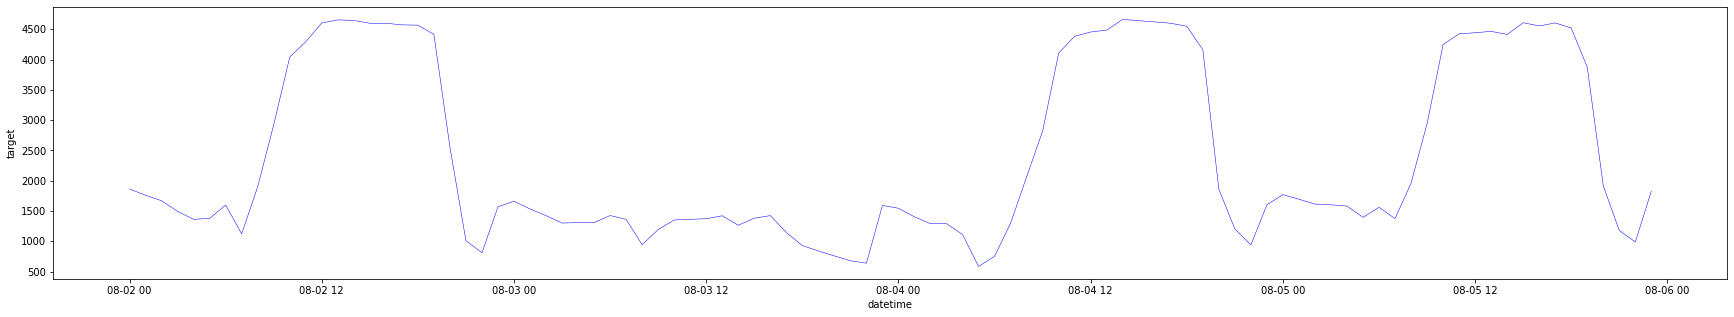

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_40.loc['2020-08-02':'2020-08-05'], x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_40 = pd.concat([building_40.loc[:'2020-08-02'], building_40.loc['2020-08-04':]])

### 빌딩41

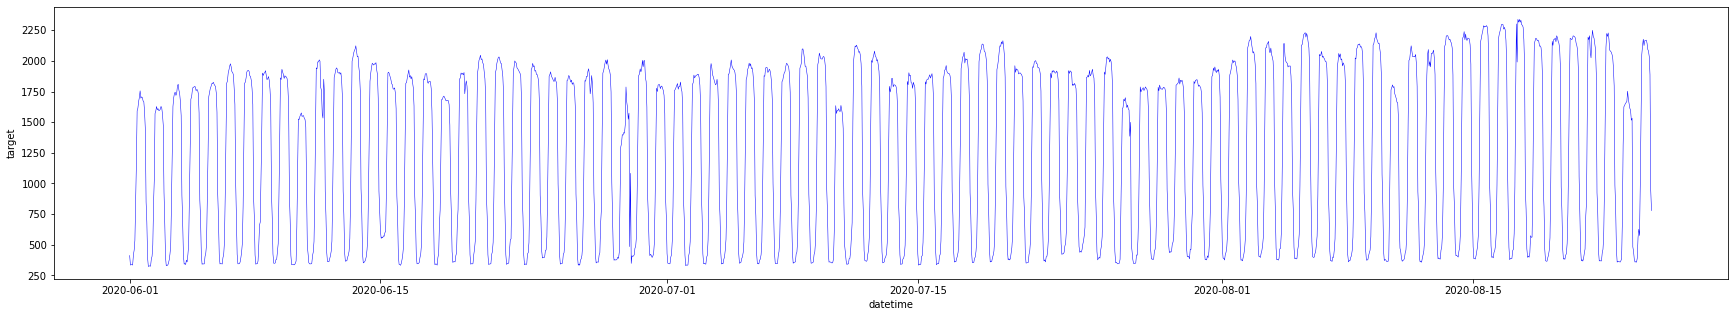

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_41, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

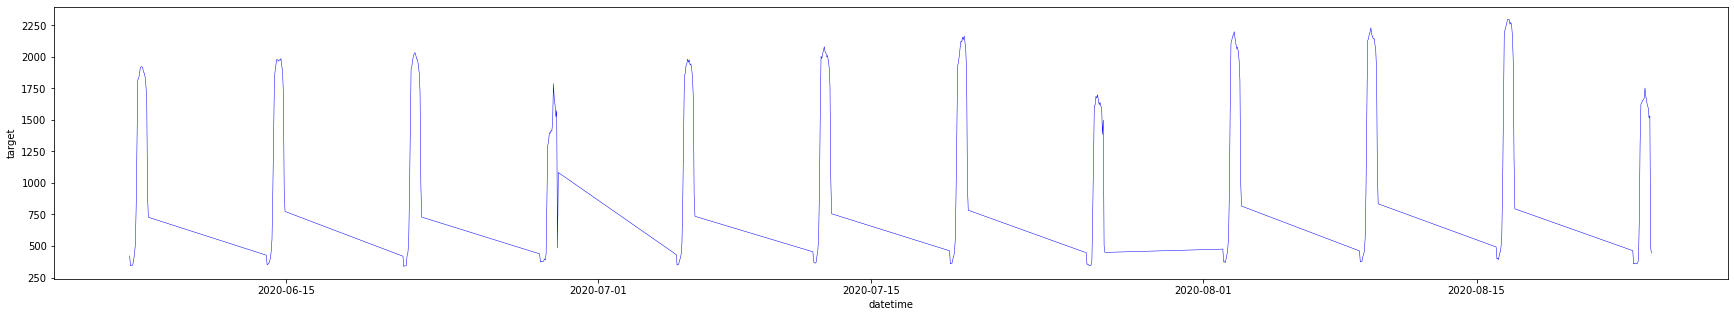

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_41[building_41['weekday']==6], x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_41[building_41['weekday']==5]

num    target  temperature  windspeed  humidity  \
datetime                                                               
2020-06-06 00:00:00   41   418.932         18.3        1.1      91.0   
2020-06-06 01:00:00   41   342.954         18.0        0.8      91.0   
2020-06-06 02:00:00   41   346.356         17.6        0.5      95.0   
2020-06-06 03:00:00   41   344.250         17.4        0.3      95.0   
2020-06-06 04:00:00   41   342.468         17.1        0.0      95.0   
...                  ...       ...          ...        ...       ...   
2020-08-22 19:00:00   41  2030.508         23.1        1.4      98.0   
2020-08-22 20:00:00   41  1943.514         22.3        1.0      99.0   
2020-08-22 21:00:00   41  1795.932         22.6        0.7     100.0   
2020-08-22 22:00:00   41   985.284         22.5        0.4     100.0   
2020-08-22 23:00:00   41   797.040         22.5        0.6     100.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-06-06 00:00:00            0.0         0.0              1.0         0.0   
2020-06-06 01:00:00            0.0         0.0              1.0         0.0   
2020-06-06 02:00:00            0.0         0.0              1.0         0.0   
2020-06-06 03:00:00            0.0         0.0              1.0         0.0   
2020-06-06 04:00:00            0.0         0.0              1.0         0.0   
...                            ...         ...              ...         ...   
2020-08-22 19:00:00            4.5         0.0              1.0         0.0   
2020-08-22 20:00:00            7.7         0.0              1.0         0.0   
2020-08-22 21:00:00            2.4         0.0              1.0         0.0   
2020-08-22 22:00:00            5.0         0.0              1.0         0.0   
2020-08-22 23:00:00            0.0         0.0              1.0         0.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-06-06 00:00:00     0  ...     121        14641           36   
2020-06-06 01:00:00     1  ...     122        14884           36   
2020-06-06 02:00:00     2  ...     123        15129           36   
2020-06-06 03:00:00     3  ...     124        15376           36   
2020-06-06 04:00:00     4  ...     125        15625           36   
...                   ...  ...     ...          ...          ...   
2020-08-22 19:00:00    19  ...    1988      3952144         6889   
2020-08-22 20:00:00    20  ...    1989      3956121         6889   
2020-08-22 21:00:00    21  ...    1990      3960100         6889   
2020-08-22 22:00:00    22  ...    1991      3964081         6889   
2020-08-22 23:00:00    23  ...    1992      3968064         6889   

                     temperature_f   heatindex  windchillindex   CDH  \
datetime                                                               
2020-06-06 00:00:00          36.14  132.428080       19.877104 -32.5   
2020-06-06 01:00:00          35.60  135.124114       20.448866 -39.4   
2020-06-06 02:00:00          34.88  133.540220       21.204400 -48.0   
2020-06-06 03:00:00          34.52  135.421551       22.029688 -57.5   
2020-06-06 04:00:00          33.98  138.288225       25.523025 -68.0   
...                            ...         ...             ...   ...   
2020-08-22 19:00:00          44.78   86.831735       23.696998   0.2   
2020-08-22 20:00:00          43.34   90.273641       23.634825  -4.0   
2020-08-22 21:00:00          43.88   86.789704       24.521431  -7.7   
2020-08-22 22:00:00          43.70   87.415873       25.263023 -12.5   
2020-08-22 23:00:00          43.70   87.415873       24.685906 -17.8   

                      mean_CDH  typoon  817  
datetime                                     
2020-06-06 00:00:00 -40.066667       0    0  
2020-06-06 01:00:00 -40.066667       0    0  
2020-06-06 02:00:00 -40.066667       0    0  
2020

### 빌딩42

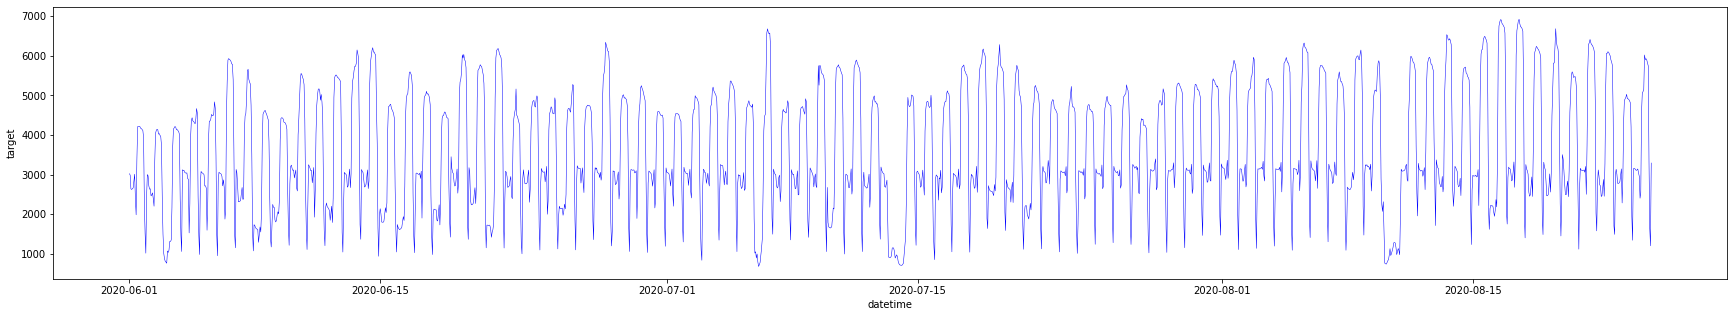

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_42, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_42 = pd.concat([building_42.loc[:'2020-07-12 23:00:00'],building_42.loc['2020-07-14':]])
building_42 = pd.concat([building_42.loc[:'2020-08-09 23:00:00'],building_42.loc['2020-08-11':]])

### 빌딩43

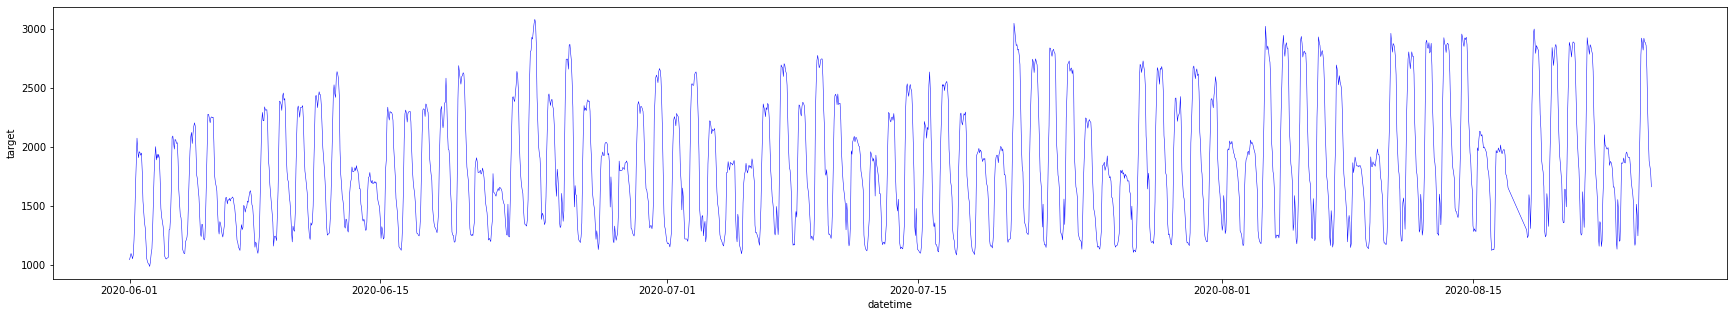

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_43, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩44

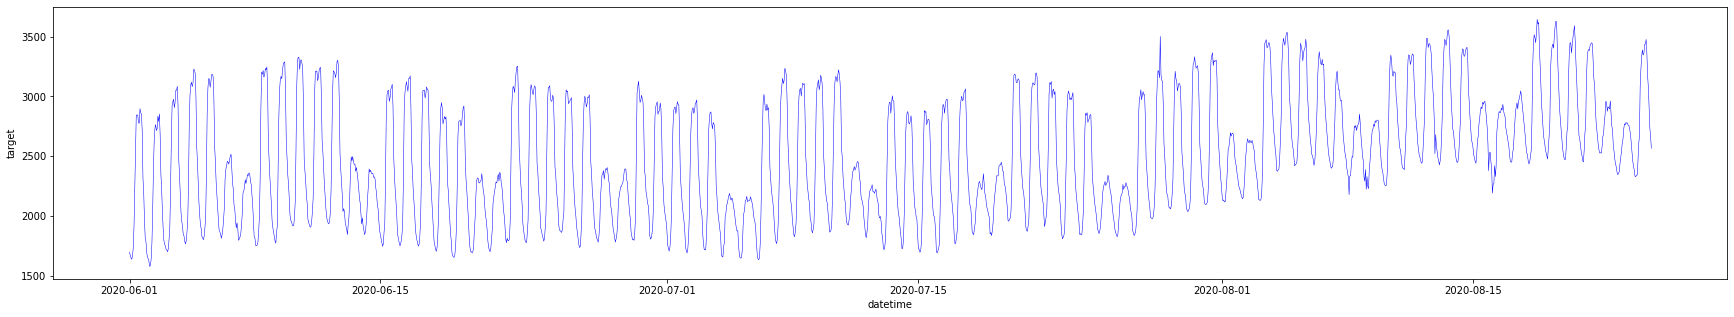

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_44, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩45

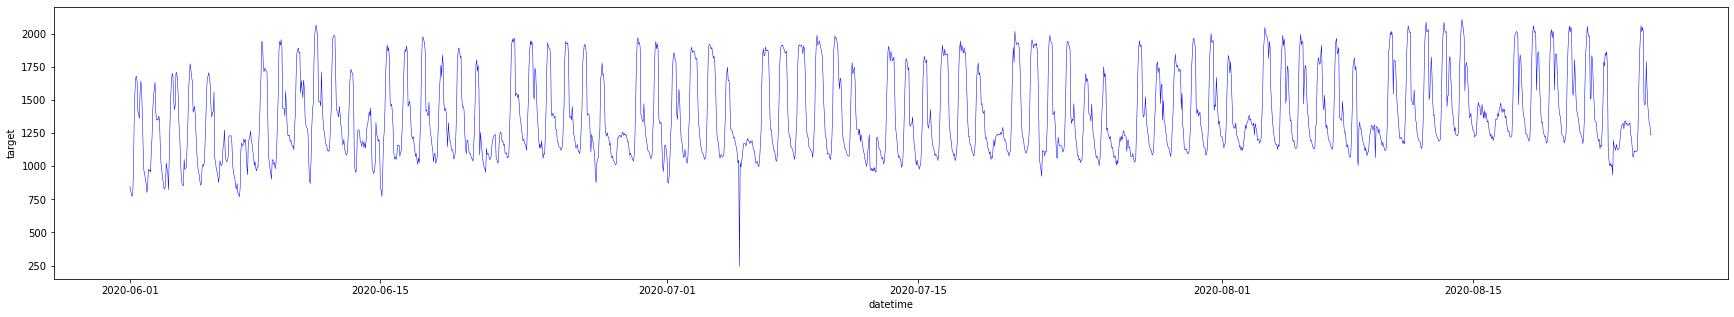

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_45, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_45[building_45['target'] < 700]

num   target  temperature  windspeed  humidity  \
datetime                                                              
2020-07-05 01:00:00   45  243.216         19.7        1.2      92.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-07-05 01:00:00            0.0         0.0              0.0         1.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-07-05 01:00:00     1  ...     818       669124         1225   

                     temperature_f   heatindex  windchillindex   CDH  \
datetime                                                               
2020-07-05 01:00:00          38.66  119.277459       20.907636 -30.9   

                      mean_CDH  typoon  817  
datetime                                     
2020-07-05 01:00:00 -43.116667       0    0  

[1 rows x 30 columns]

In [ ]:
#이상치 양 옆 평균값으로 바꾸기
building_45.loc['2020-07-05 01:00:00','target'] = (building_45.loc['2020-07-05 00:00:00', 'target'] + building_45.loc['2020-07-05 02:00:00', 'target']) / 2

C:\Users\YOGA\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### 빌딩46

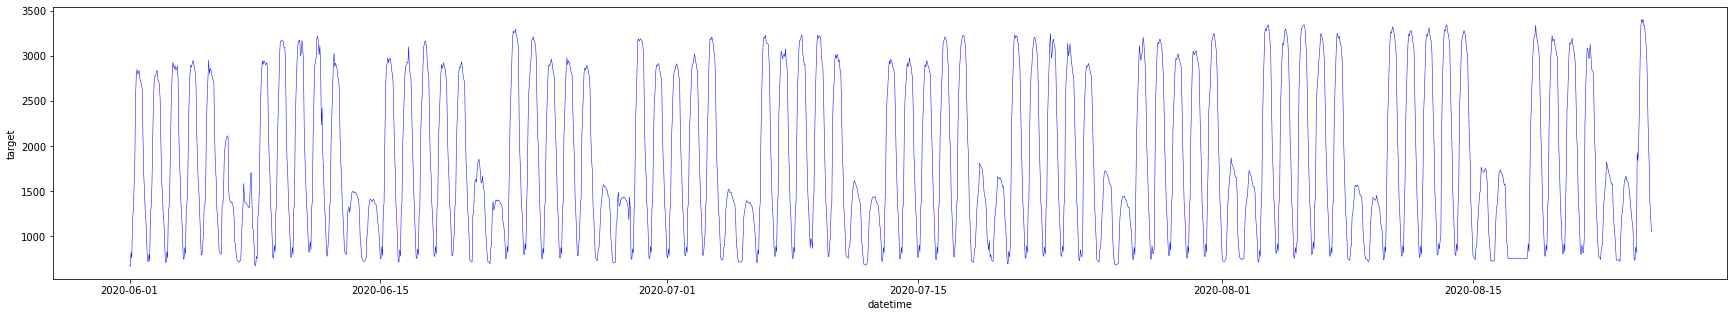

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_46, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩47

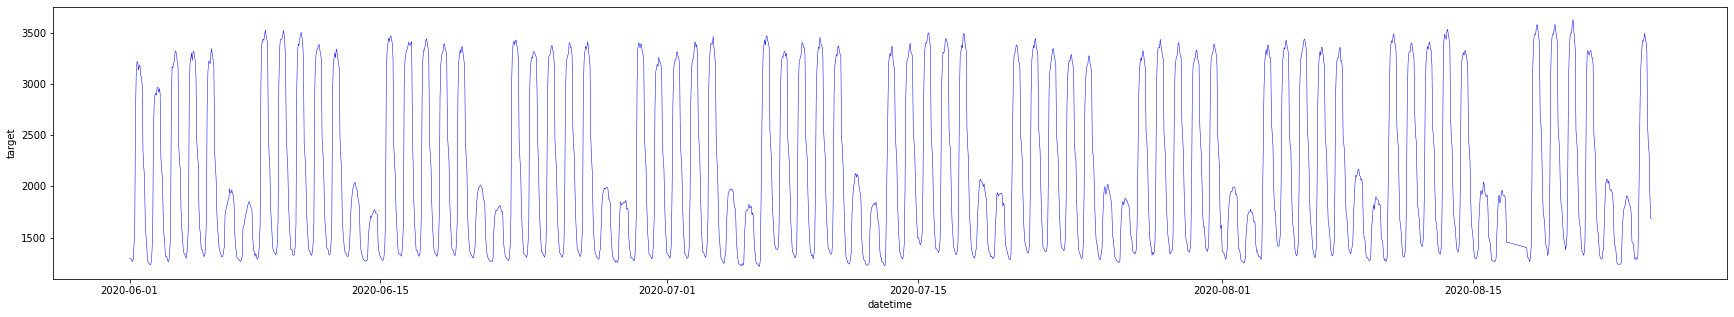

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_47, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩48

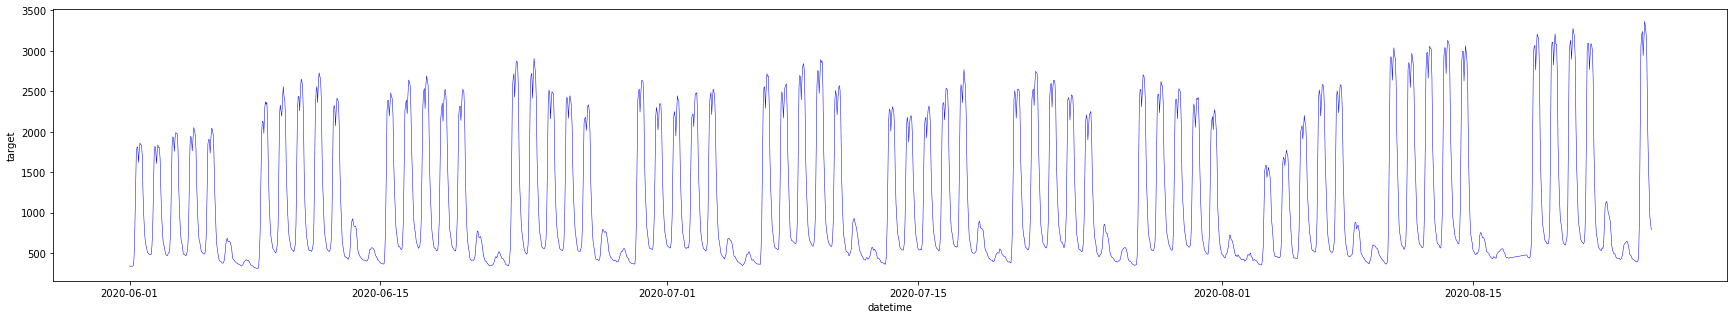

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_48, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩49

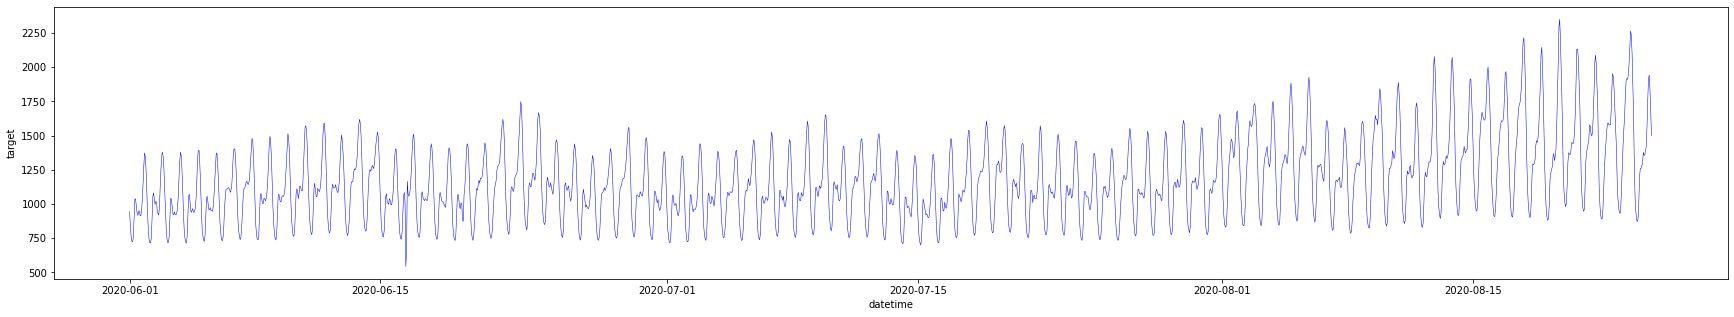

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_49, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩50

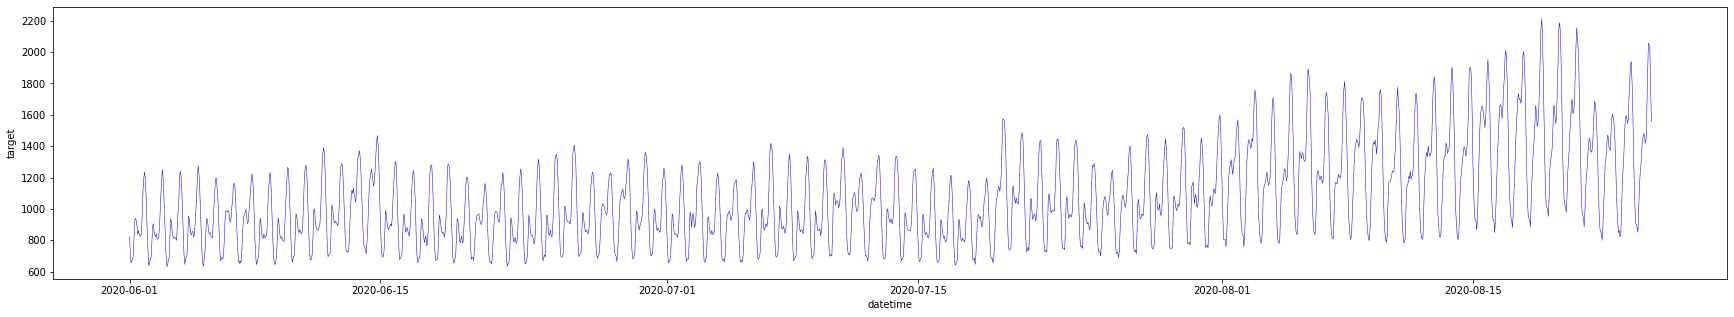

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_50, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩51

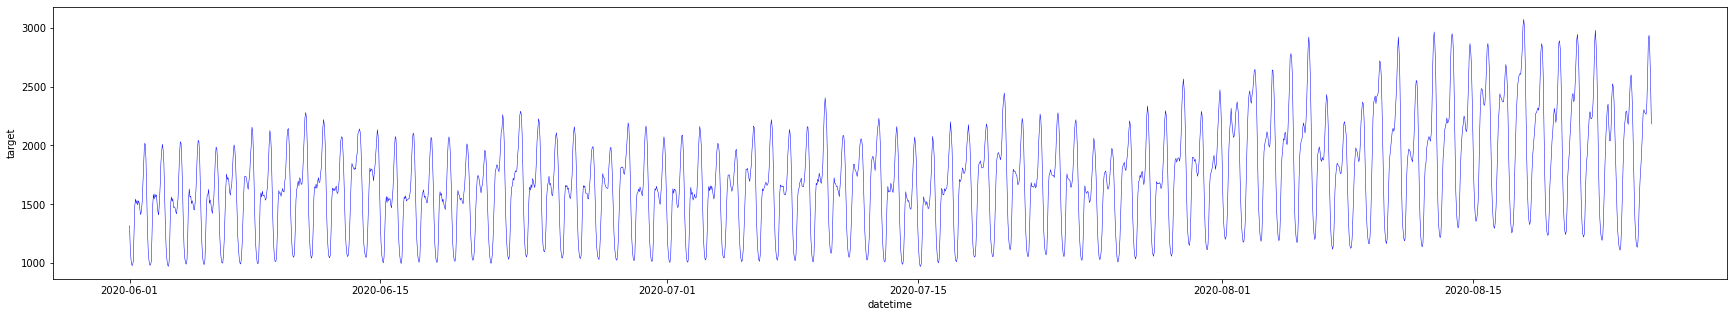

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_51, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩52

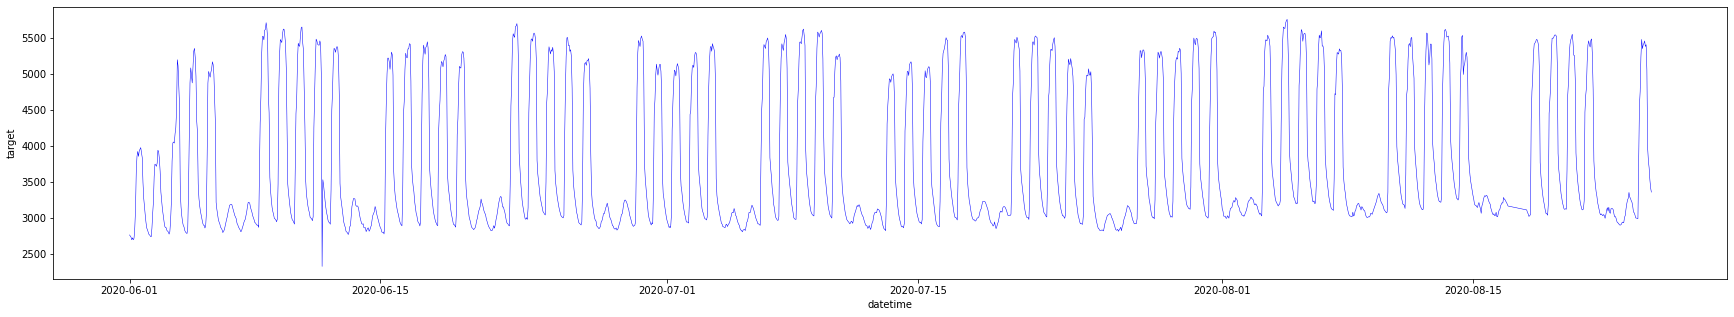

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_52, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_52[building_52['target'] < 2600]

num   target  temperature  windspeed  humidity  \
datetime                                                              
2020-06-11 18:00:00   52  2327.67         30.5        3.2      45.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-06-11 18:00:00            0.0         1.0              1.0         1.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-06-11 18:00:00    18  ...     259        67081          121   

                     temperature_f  heatindex  windchillindex   CDH  mean_CDH  \
datetime                                                                        
2020-06-11 18:00:00           58.1  84.791213       30.171914  22.9 -8.341667   

                     typoon  817  
datetime                          
2020-06-11 18:00:00       0    0  

[1 rows x 30 columns]

In [ ]:
building_52.loc['2020-06-11 18:00:00', 'target'] = (building_52.loc['2020-06-11 17:00:00', 'target'] + building_52.loc['2020-06-11 19:00:00', 'target']) / 2 

C:\Users\YOGA\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### 빌딩53

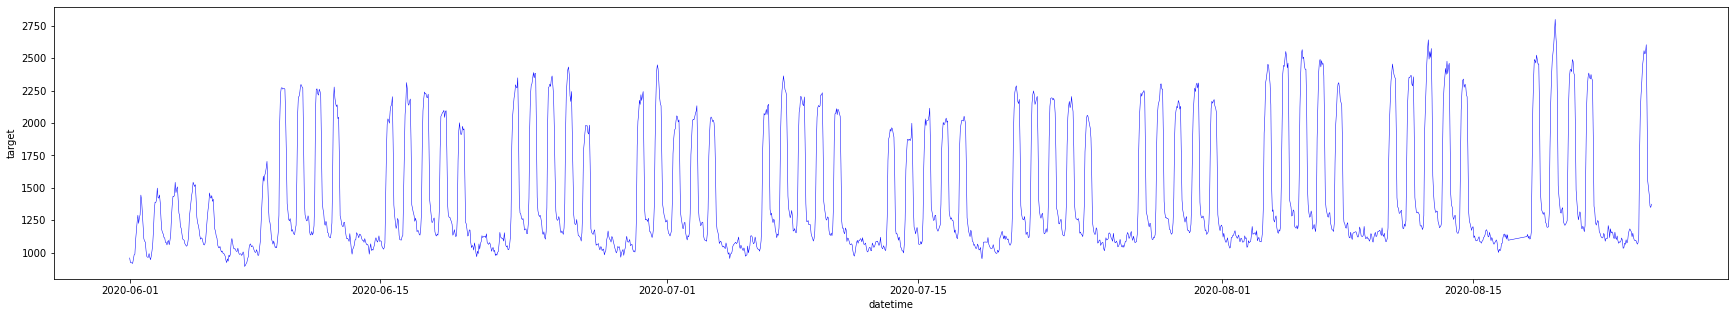

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_53, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_53 = building_53.loc['2020-06-08':]

### 빌딩54

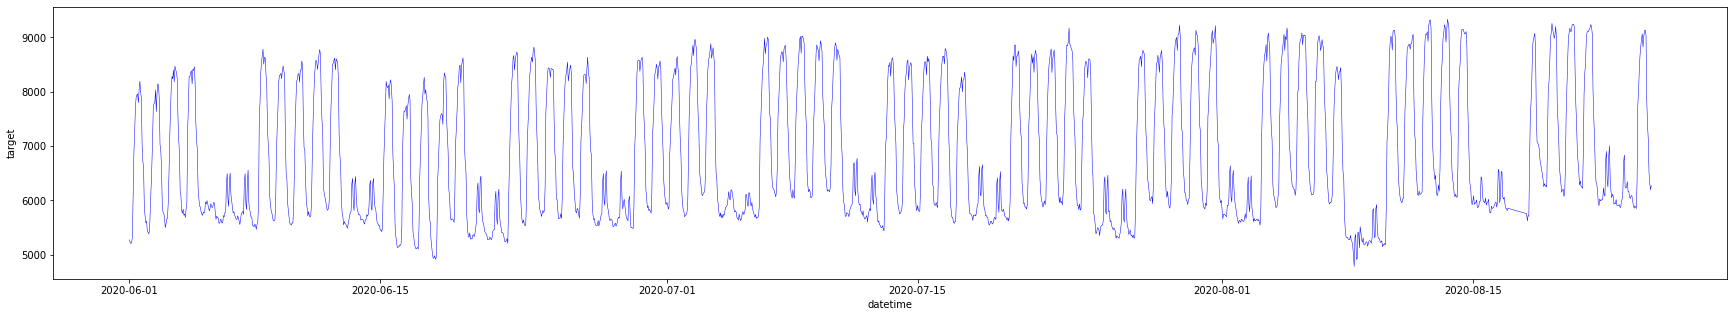

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_54, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩55

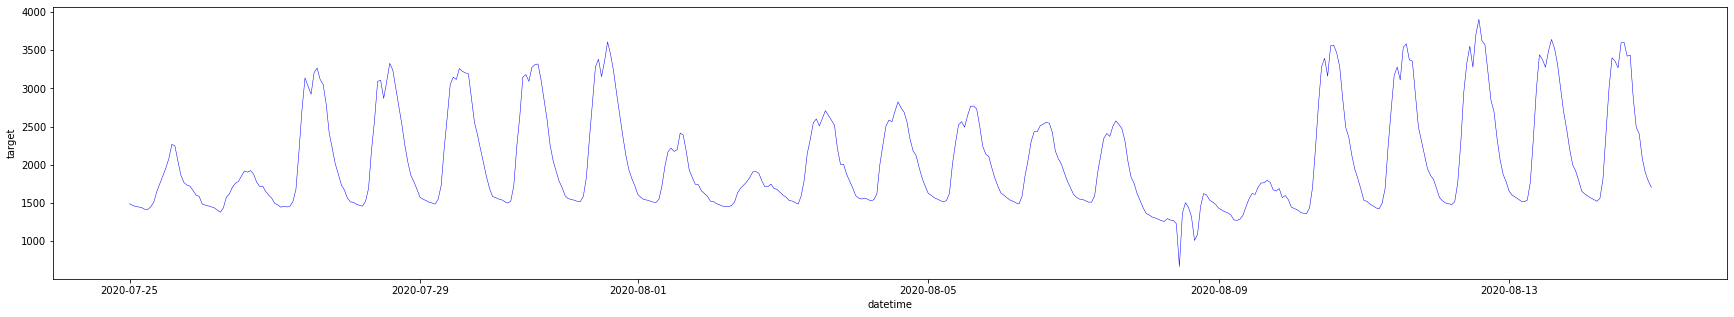

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_55.loc['2020-07-25':'2020-08-14'], x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_55[building_55['target'] < 1000]

num   target  temperature  windspeed  humidity  \
datetime                                                              
2020-08-08 11:00:00   55  670.536         25.4        2.5      77.0   

                     precipitation  insolation  nelec_cool_flag  solar_flag  \
datetime                                                                      
2020-08-08 11:00:00            0.0         0.0              1.0         1.0   

                     hour  ...  hour_1 squared_hour  squared_day  \
datetime                   ...                                     
2020-08-08 11:00:00    11  ...    1644      2702736         4761   

                     temperature_f  heatindex  windchillindex   CDH  \
datetime                                                              
2020-08-08 11:00:00          48.92  96.448536       24.873605 -26.5   

                      mean_CDH  typoon  817  
datetime                                     
2020-08-08 11:00:00 -18.958333       0    0  

[1 rows x 30 columns]

In [ ]:
building_55.loc['2020-08-08 11:00:00', 'target'] = (building_55.loc['2020-08-08 10:00:00', 'target'] + building_55.loc['2020-06-11 12:00:00', 'target']) / 2 

C:\Users\YOGA\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
building_55 = pd.concat([building_55.loc[:'2020-08-02'], building_55.loc['2020-08-09':]])

### 빌딩56

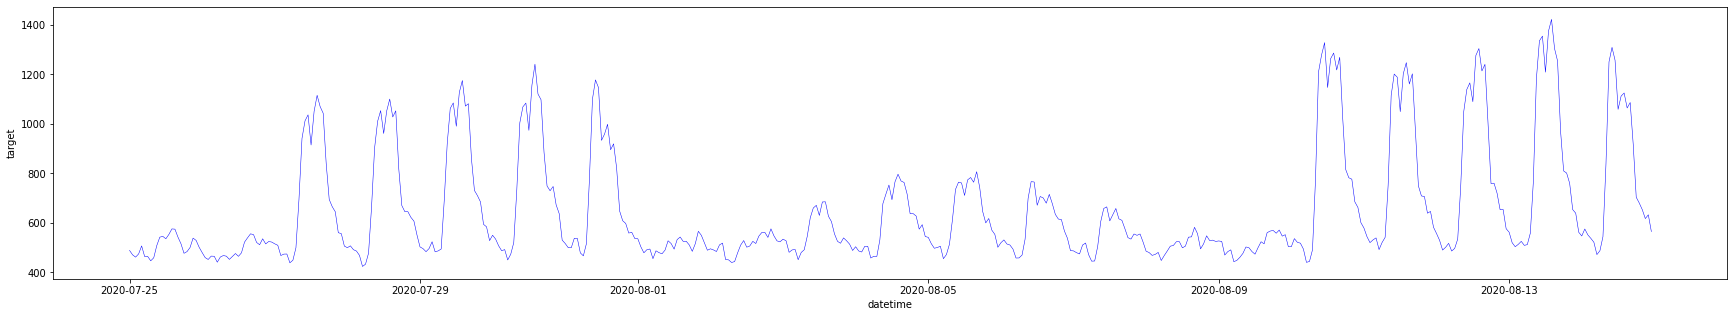

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_56.loc['2020-07-25':'2020-08-14'], x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

In [ ]:
building_56 = pd.concat([building_56.loc[:'2020-08-02'], building_56.loc['2020-08-09':]])

### 빌딩57

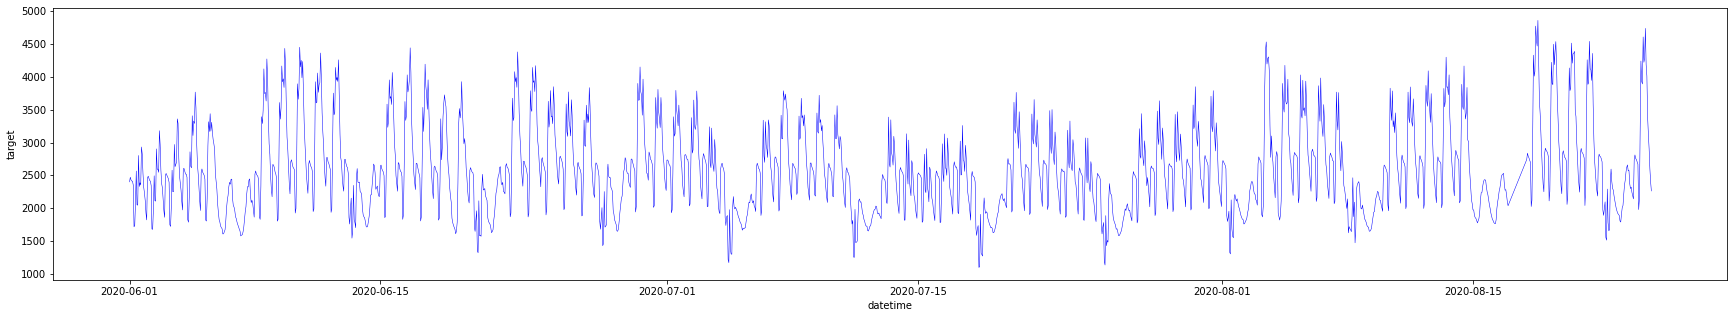

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_57, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩58

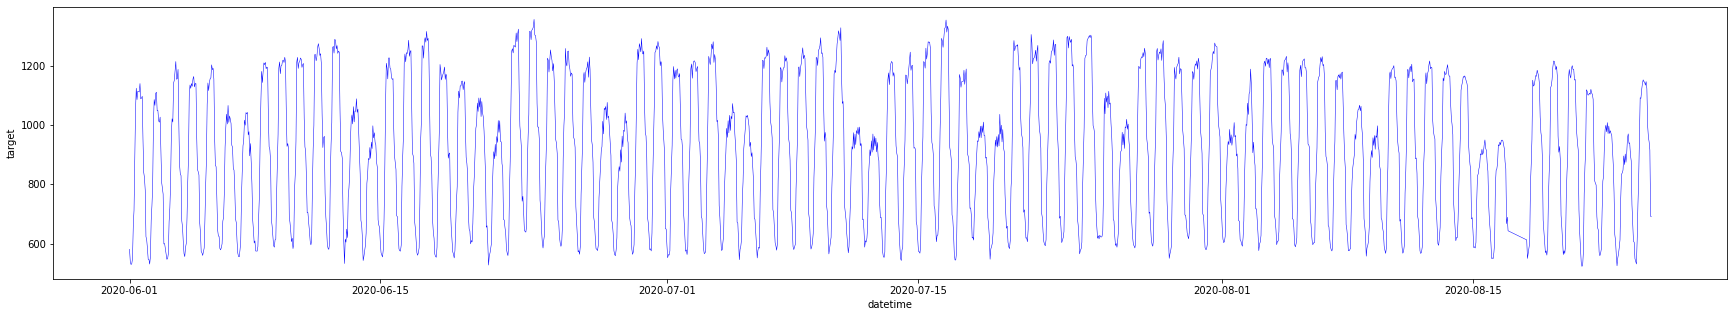

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_58, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩59

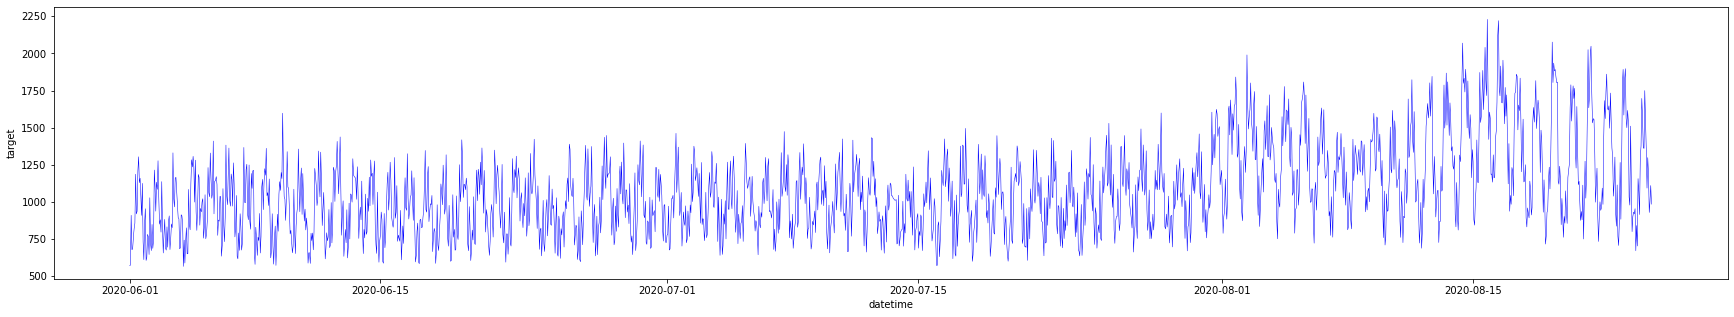

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_59, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');

### 빌딩60

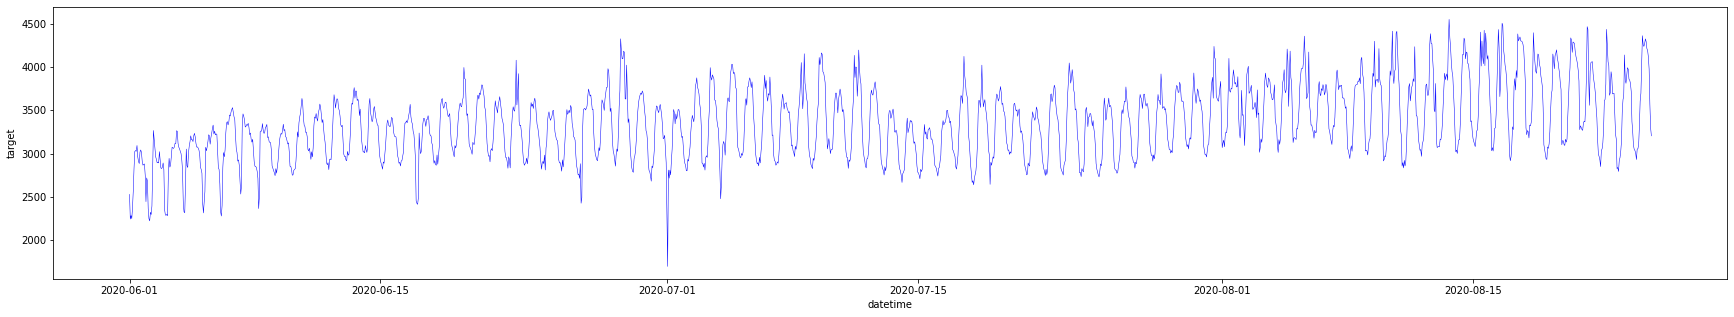

In [ ]:
fig = plt.figure(figsize = (30, 5))
sns.lineplot(data = building_60, x= 'datetime', y = 'target', linewidth = 0.5, color = 'blue');